In [267]:
# Install scikeras
!pip install scikeras

In [287]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from neuralprophet import NeuralProphet

import tensorflow as tf
import sklearn
import joblib

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import parallel_backend

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

#import warnings;
#warnings.simplefilter('ignore')

In [288]:
# Load Data

csv = "C:\\Users\\rxh07\\Downloads\\IOD\\Capstone\\crop_yield.csv\\crop_yield.csv"
crop_yield = pd.read_csv(csv)
crop_yield

Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0           56708           2051.4   7024878.38   22882.34     0.796087  
1            4685           2051.4    631643.29    2057.47     0.710435  
2              22           2051.4     75755.32     246.76     0.238333  
3       126905000           2051.4   1870661.52    6093.36  5238.051739  
4             794           2051.4    165500.63     539.09     0.420909  
...           ...              ...          ...        ...          ...  
19684        2000           1498.0    395200.00    1160.00     0.500000  
19685        3000           1498.0     98800.00     290.00     3.000000  
19686      440900           1356.2  29586735.11   96373.73     1.285000  
19687        5488           1356.2  26242746.82   85481.26     0.016667  
19688      392160           1356.2  22778368.48   74196.64     1.261818  

[19689 rows x 10 columns]

In [289]:
# Sort df

crop_yield = crop_yield.sort_values(by = ['Crop_Year', 'Crop', 'Yield'])
crop_yield

Crop  Crop_Year       Season        State      Area  \
0            Arecanut       1997  Whole Year         Assam   73814.0   
57           Arecanut       1997  Whole Year        Kerala   76145.0   
62           Arecanut       1997  Whole Year     Meghalaya    9569.0   
27           Arecanut       1997  Whole Year     Karnataka   93100.0   
88           Arecanut       1997  Whole Year   West Bengal    8058.0   
...               ...        ...          ...          ...       ...   
17347            Urad       2020  Kharif       Uttarakhand   12398.0   
17348            Urad       2020  Summer       Uttarakhand      58.0   
17349           Wheat       2020  Rabi         Uttarakhand  297189.0   
17351  other oilseeds       2020  Rabi         Uttarakhand      30.0   
17350  other oilseeds       2020  Kharif       Uttarakhand      13.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0           56708      2051.400000   7024878.38   22882.34  0.796087  
57          93995      3252.400000   7246719.65   23604.95  1.147857  
62          12116      3818.200000    910681.73    2966.39  1.245714  
27         133342      1266.700000   8860327.00   28861.00  1.293571  
88          12423      1852.900000    766879.86    2497.98  1.691765  
...           ...              ...          ...        ...       ...  
17347       13282      1313.947826   2400376.78    4587.26  1.120769  
17348          69      1313.947826     11229.38      21.46  1.193333  
17349      937003      1313.947826  57538762.29  109959.93  2.216154  
17351          21      1313.947826      5808.30      11.10  0.690000  
17350           9      1313.947826      2516.93       4.81  0.700000  

[19689 rows x 10 columns]

In [290]:
# Reset index

crop_yield.reset_index(inplace = True)
crop_yield

index            Crop  Crop_Year       Season        State      Area  \
0          0        Arecanut       1997  Whole Year         Assam   73814.0   
1         57        Arecanut       1997  Whole Year        Kerala   76145.0   
2         62        Arecanut       1997  Whole Year     Meghalaya    9569.0   
3         27        Arecanut       1997  Whole Year     Karnataka   93100.0   
4         88        Arecanut       1997  Whole Year   West Bengal    8058.0   
...      ...             ...        ...          ...          ...       ...   
19684  17347            Urad       2020  Kharif       Uttarakhand   12398.0   
19685  17348            Urad       2020  Summer       Uttarakhand      58.0   
19686  17349           Wheat       2020  Rabi         Uttarakhand  297189.0   
19687  17351  other oilseeds       2020  Rabi         Uttarakhand      30.0   
19688  17350  other oilseeds       2020  Kharif       Uttarakhand      13.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0           56708      2051.400000   7024878.38   22882.34  0.796087  
1           93995      3252.400000   7246719.65   23604.95  1.147857  
2           12116      3818.200000    910681.73    2966.39  1.245714  
3          133342      1266.700000   8860327.00   28861.00  1.293571  
4           12423      1852.900000    766879.86    2497.98  1.691765  
...           ...              ...          ...        ...       ...  
19684       13282      1313.947826   2400376.78    4587.26  1.120769  
19685          69      1313.947826     11229.38      21.46  1.193333  
19686      937003      1313.947826  57538762.29  109959.93  2.216154  
19687          21      1313.947826      5808.30      11.10  0.690000  
19688           9      1313.947826      2516.93       4.81  0.700000  

[19689 rows x 11 columns]

In [291]:
# Check nulls
crop_yield.isnull().sum()

index              0
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [292]:
#Get info
crop_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            19689 non-null  int64  
 1   Crop             19689 non-null  object 
 2   Crop_Year        19689 non-null  int64  
 3   Season           19689 non-null  object 
 4   State            19689 non-null  object 
 5   Area             19689 non-null  float64
 6   Production       19689 non-null  int64  
 7   Annual_Rainfall  19689 non-null  float64
 8   Fertilizer       19689 non-null  float64
 9   Pesticide        19689 non-null  float64
 10  Yield            19689 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 1.7+ MB


In [293]:
# Describe
crop_yield.describe().T

count          mean           std      min        25%  \
index            19689.0  9.844000e+03  5.683869e+03     0.00    4922.00   
Crop_Year        19689.0  2.009128e+03  6.498099e+00  1997.00    2004.00   
Area             19689.0  1.799266e+05  7.328287e+05     0.50    1390.00   
Production       19689.0  1.643594e+07  2.630568e+08     0.00    1393.00   
Annual_Rainfall  19689.0  1.437755e+03  8.169096e+02   301.30     940.70   
Fertilizer       19689.0  2.410331e+07  9.494600e+07    54.17  188014.62   
Pesticide        19689.0  4.884835e+04  2.132874e+05     0.09     356.70   
Yield            19689.0  7.995401e+01  8.783062e+02     0.00       0.60   

                        50%           75%           max  
index               9844.00  1.476600e+04  1.968800e+04  
Crop_Year           2010.00  2.015000e+03  2.020000e+03  
Area                9317.00  7.511200e+04  5.080810e+07  
Production         13804.00  1.227180e+05  6.326000e+09  
Annual_Rainfall     1247.60  1.643700e+03  6.552700e+03  
Fertilizer       1234957.44  1.000385e+07  4.835407e+09  
Pesticide           2421.90  2.004170e+04  1.575051e+07  
Yield                  1.03  2.388889e+00  2.110500e+04

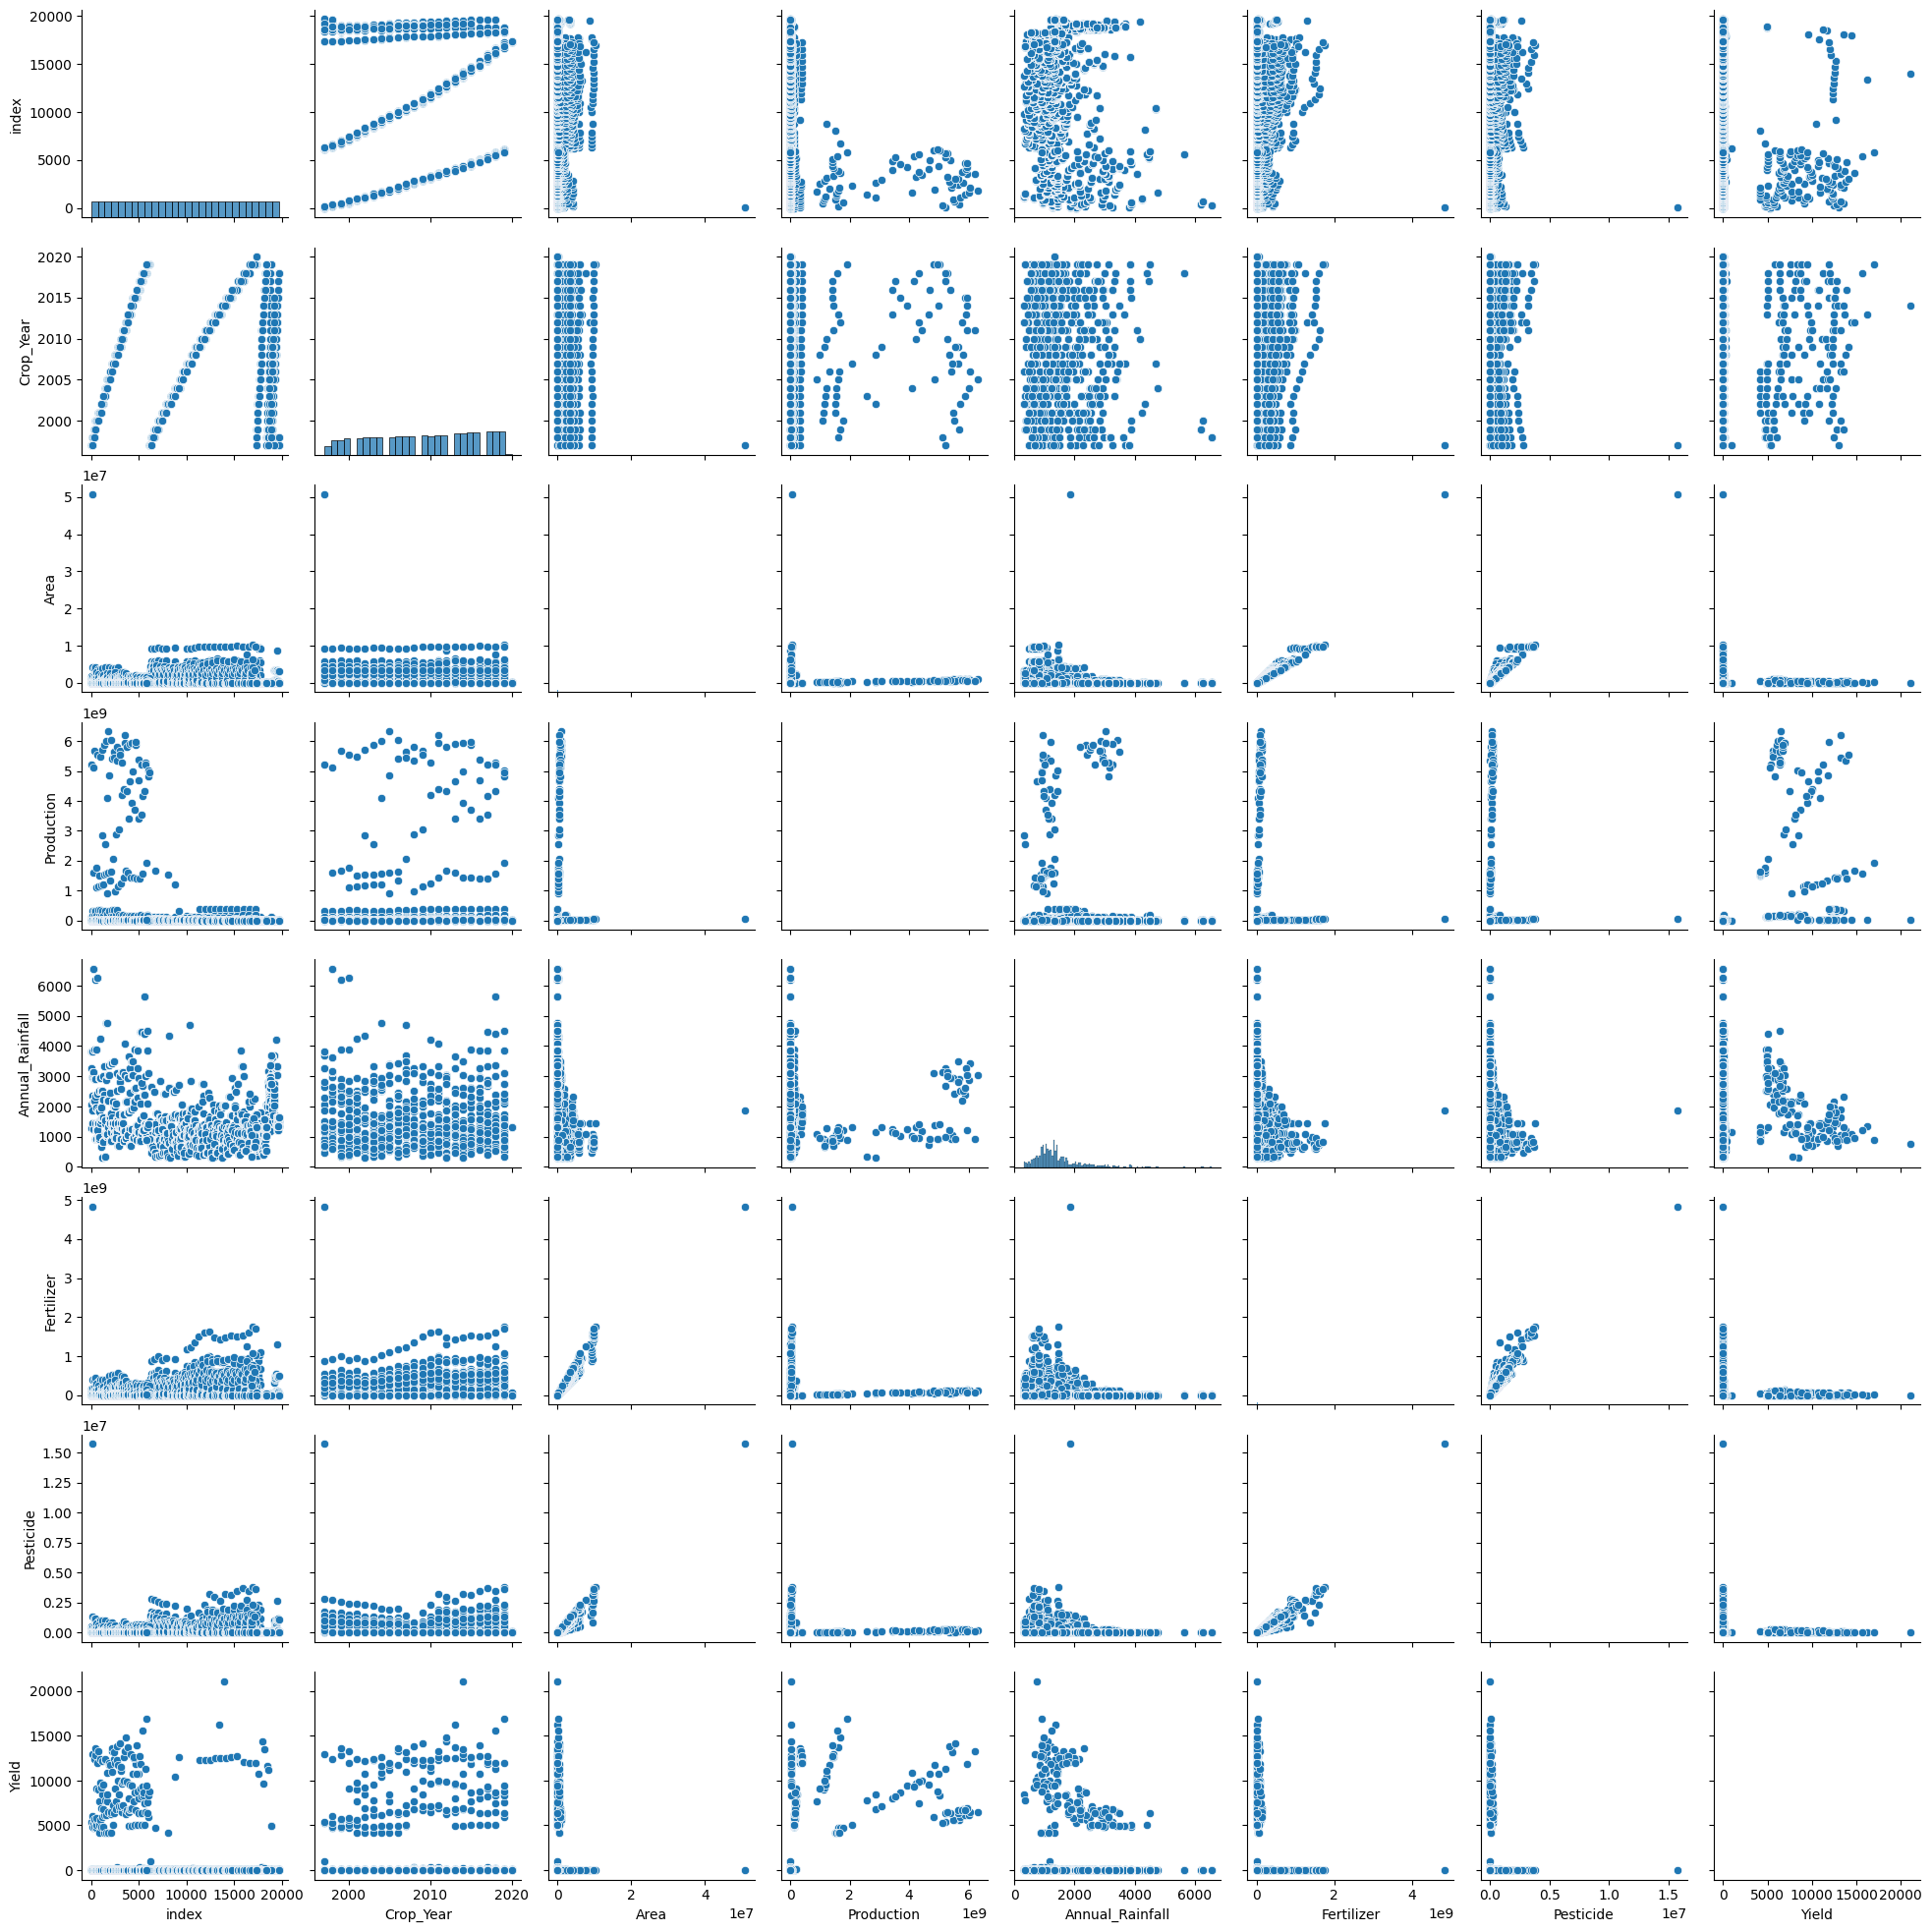

In [80]:
# Pairplot
sns.pairplot(crop_yield)

In [294]:
# Checking Season Names
crop_yield['Season'].unique()

array(['Whole Year ', 'Kharif     ', 'Winter     ', 'Autumn     ',
       'Summer     ', 'Rabi       '], dtype=object)

In [295]:
# Stripping whitespace
crop_yield = crop_yield.applymap(lambda x: x.strip() if isinstance(x, str) else x)
crop_yield['Season'].unique()

WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\AppData\Local\Temp\ipykernel_20780\2306578164.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  crop_yield = crop_yield.applymap(lambda x: x.strip() if isinstance(x, str) else x)



array(['Whole Year', 'Kharif', 'Winter', 'Autumn', 'Summer', 'Rabi'],
      dtype=object)

In [296]:
# Creating df with only cereal crops
cereal_crops = ['Barley', 'Rice', 'Maize', 'Wheat', 'Small millets', 'Other Cereals']
cereal_crop_yield = crop_yield[crop_yield['Crop'].isin(cereal_crops)]
cereal_crop_yield.reset_index(inplace = True)
cereal_crop_yield.drop(columns = ['level_0', 'index'], inplace = True)
cereal_crop_yield

WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\AppData\Local\Temp\ipykernel_20780\1606804936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal_crop_yield.drop(columns = ['level_0', 'index'], inplace = True)



Crop  Crop_Year      Season           State      Area  \
0            Barley       1997        Rabi           Bihar   42838.0   
1            Barley       1997        Rabi          Sikkim    1310.0   
2            Barley       1997        Rabi  Madhya Pradesh   91200.0   
3            Barley       1997  Whole Year     West Bengal    6116.0   
4            Barley       1997        Rabi   Uttar Pradesh  337037.0   
...             ...        ...         ...             ...       ...   
3640  Other Cereals       2020        Rabi     Uttarakhand     411.0   
3641           Rice       2020      Kharif     Uttarakhand  241936.0   
3642           Rice       2020      Summer     Uttarakhand   15315.0   
3643  Small millets       2020      Kharif     Uttarakhand   44769.0   
3644          Wheat       2020        Rabi     Uttarakhand  297189.0   

      Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0          44140      1303.700000   4076892.46   13279.78  1.040000  
1           1510      2804.100000    124672.70     406.10  1.155000  
2         110500      1189.100000   8679504.00   28272.00  1.347097  
3           5034      1852.900000    582059.72    1895.96  1.680000  
4         747044       473.900000  32075811.29  104481.47  2.046329  
...          ...              ...          ...        ...       ...  
3640         333      1313.947826     79573.71     152.07  0.808000  
3641      669372      1313.947826  46841228.96   89516.32  2.093077  
3642       55057      1313.947826   2965137.15    5666.55  3.563333  
3643       65289      1313.947826   8667726.09   16564.53  1.480909  
3644      937003      1313.947826  57538762.29  109959.93  2.216154  

[3645 rows x 10 columns]

In [297]:
# removing problematic outlier
maize_crop_yield = cereal_crop_yield[cereal_crop_yield['Crop'] == 'Maize']
maize_crop_yield.max()

maize_crop_yield[maize_crop_yield['Yield'] == 989.87].index

Index([38], dtype='int64')

In [298]:
# removing problematic outlier
cereal_crop_yield.iloc[38]
cereal_crop_yield = cereal_crop_yield.drop(index = 38)

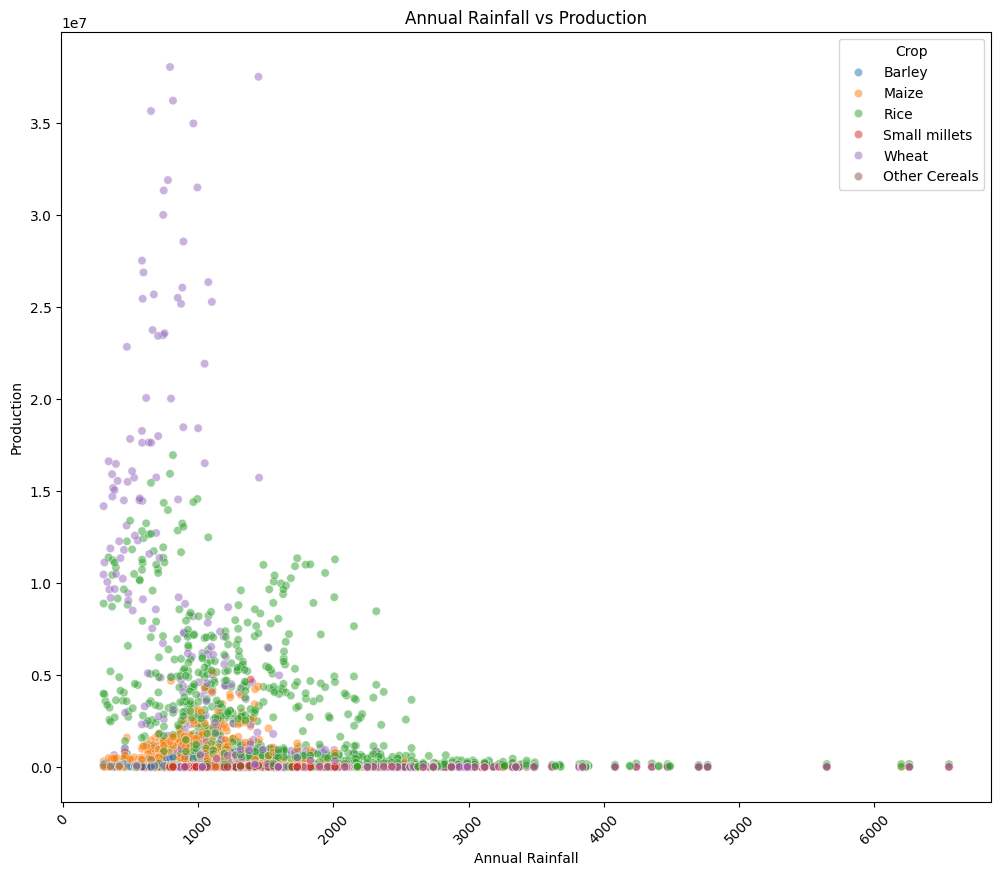

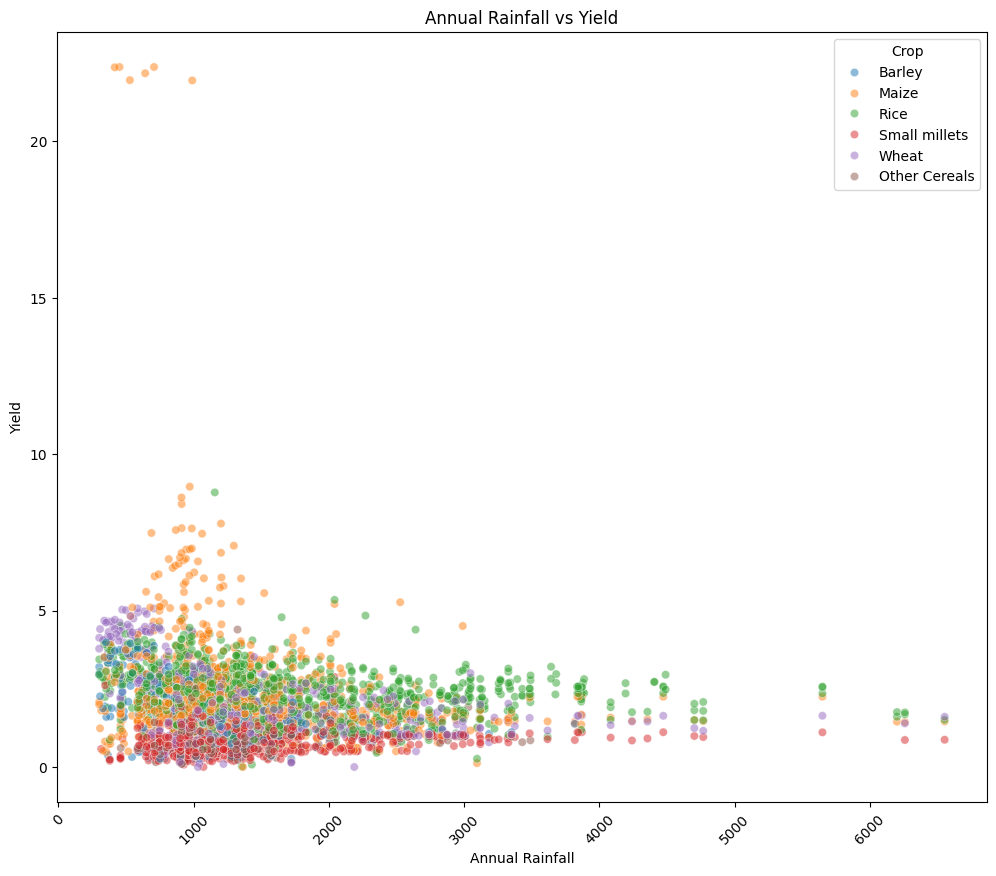

In [299]:
# Plotting rainfall vs production
plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Annual_Rainfall', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Annual Rainfall vs Production')
plt.xlabel('Annual Rainfall')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Annual_Rainfall', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Annual Rainfall vs Yield')
plt.xlabel('Annual Rainfall')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


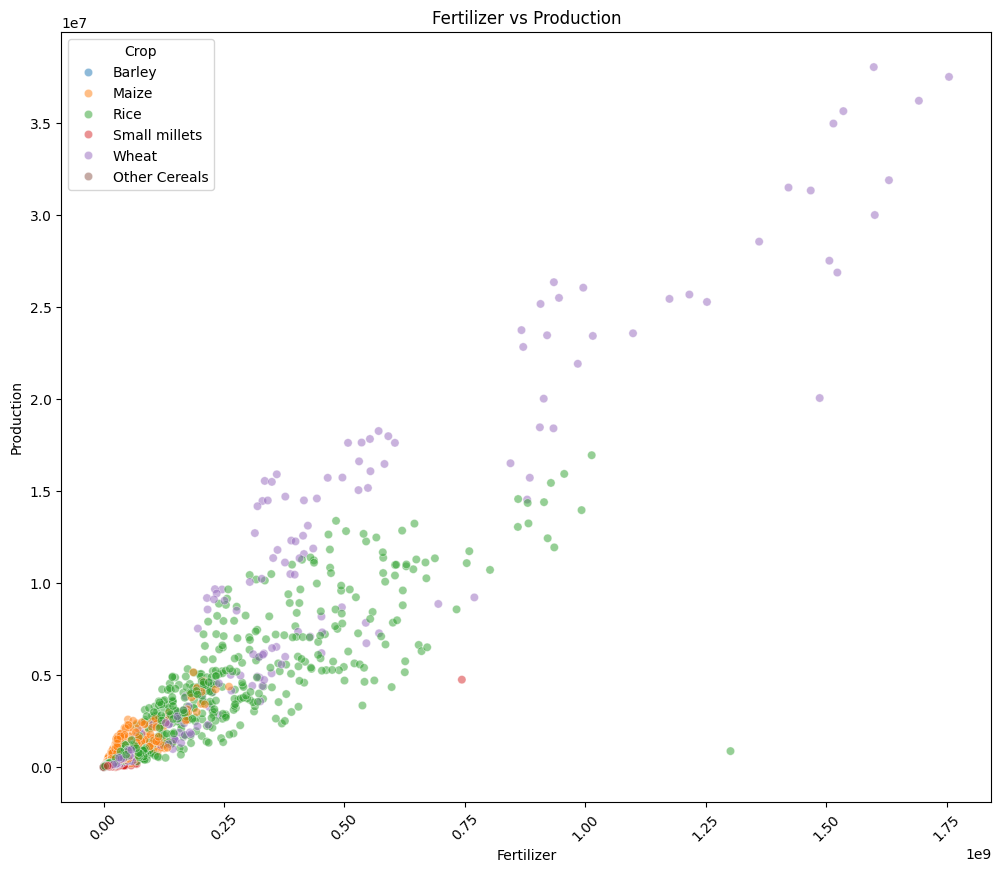

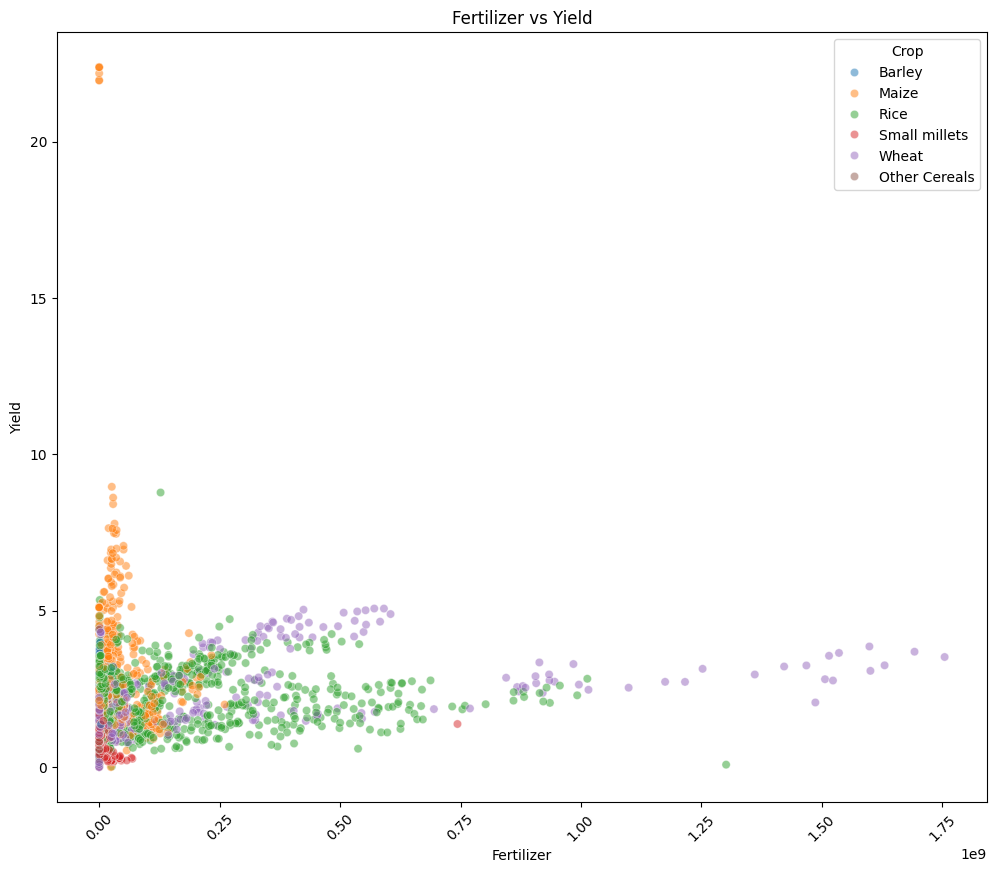

In [300]:
# Plotting fertilizer vs production

plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Fertilizer', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Fertilizer vs Production')
plt.xlabel('Fertilizer')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Fertilizer', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Fertilizer vs Yield')
plt.xlabel('Fertilizer')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


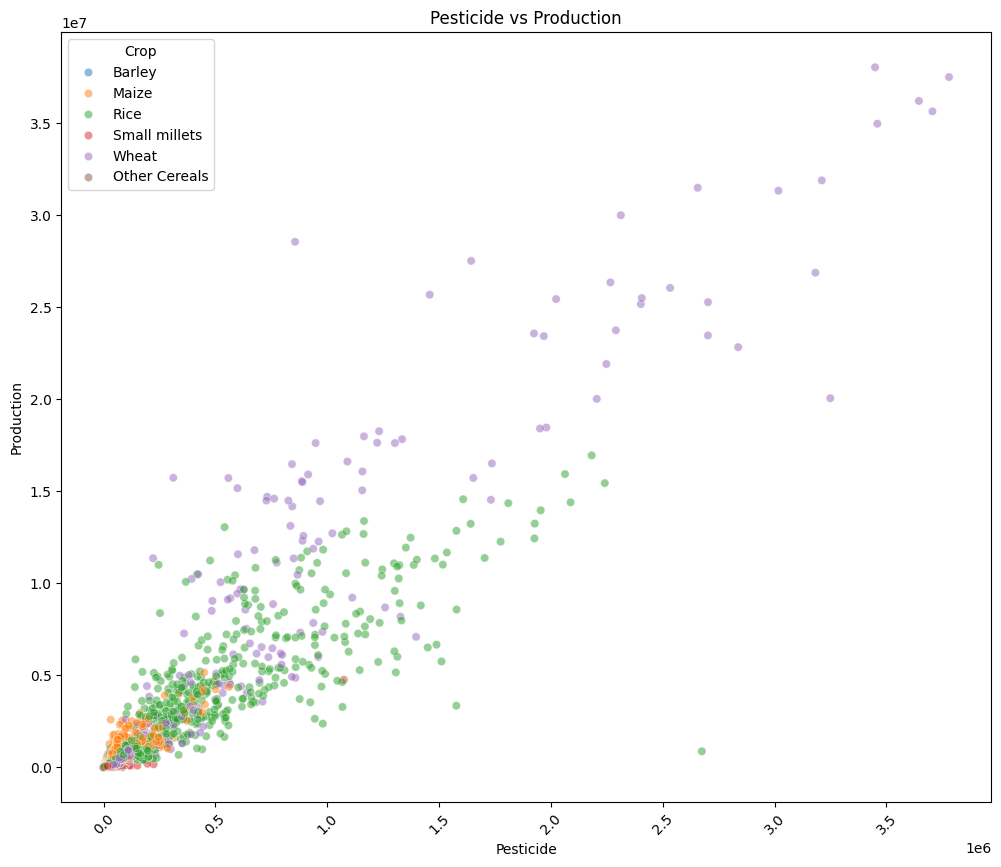

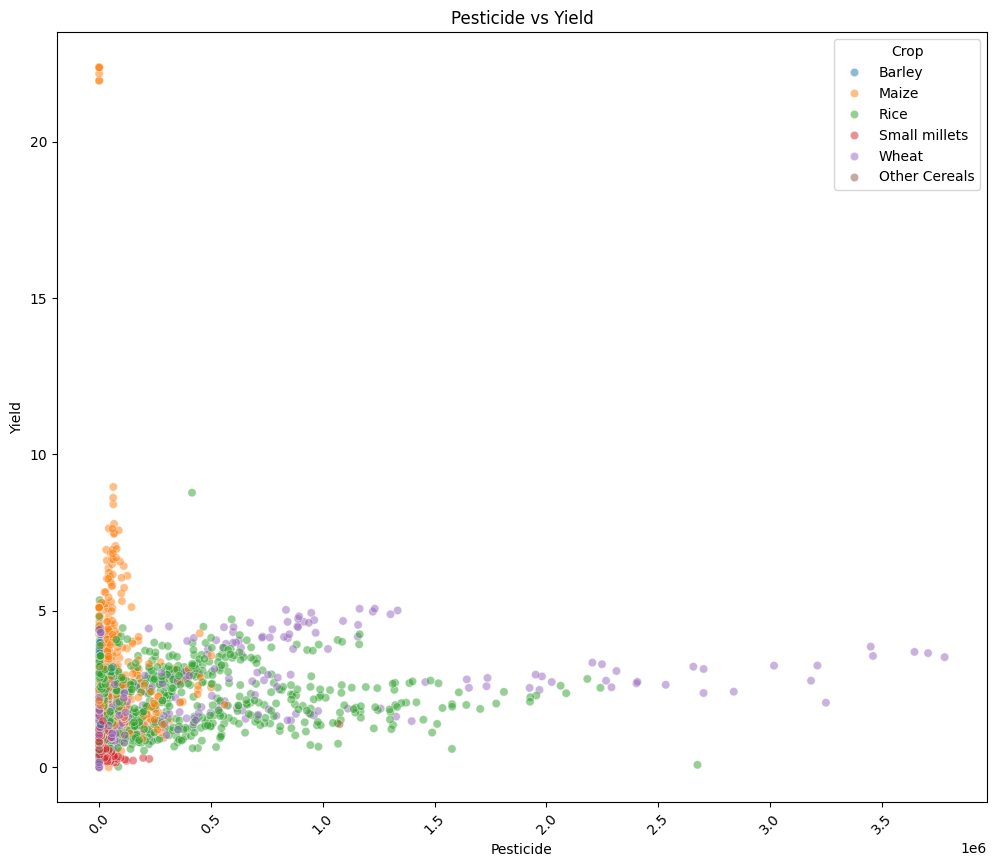

In [301]:
# Plotting pesticide vs production

plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Pesticide', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Pesticide vs Production')
plt.xlabel('Pesticide')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Pesticide', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Pesticide vs Yield')
plt.xlabel('Pesticide')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


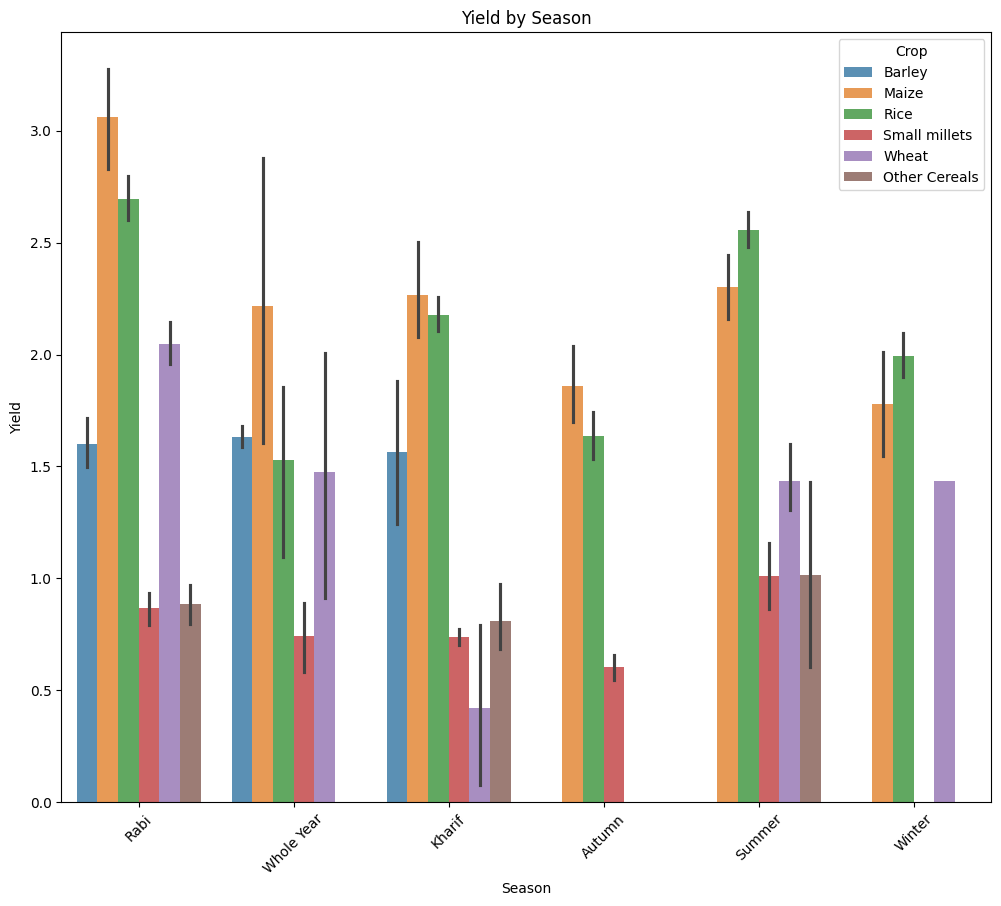

In [302]:
# Plotting yield by season

plt.figure(figsize = (12,10))
sns.barplot(data = cereal_crop_yield, x = 'Season', y = 'Yield', hue = 'Crop', alpha = 0.8)
plt.title('Yield by Season')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()

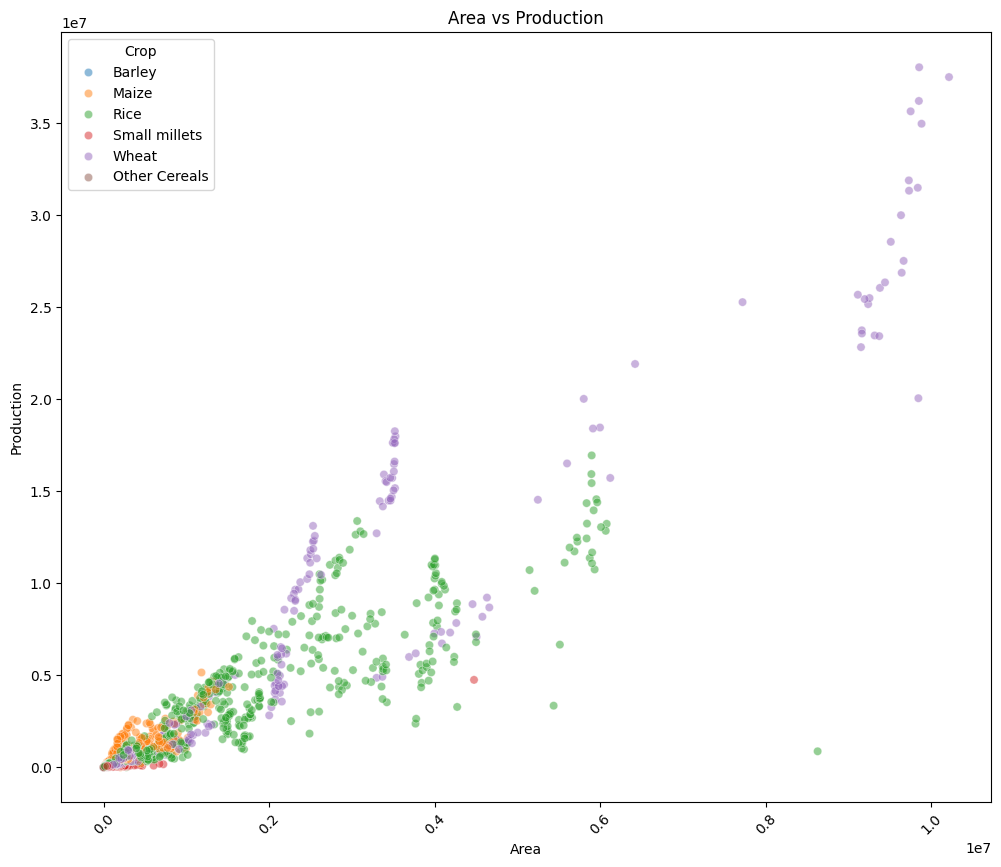

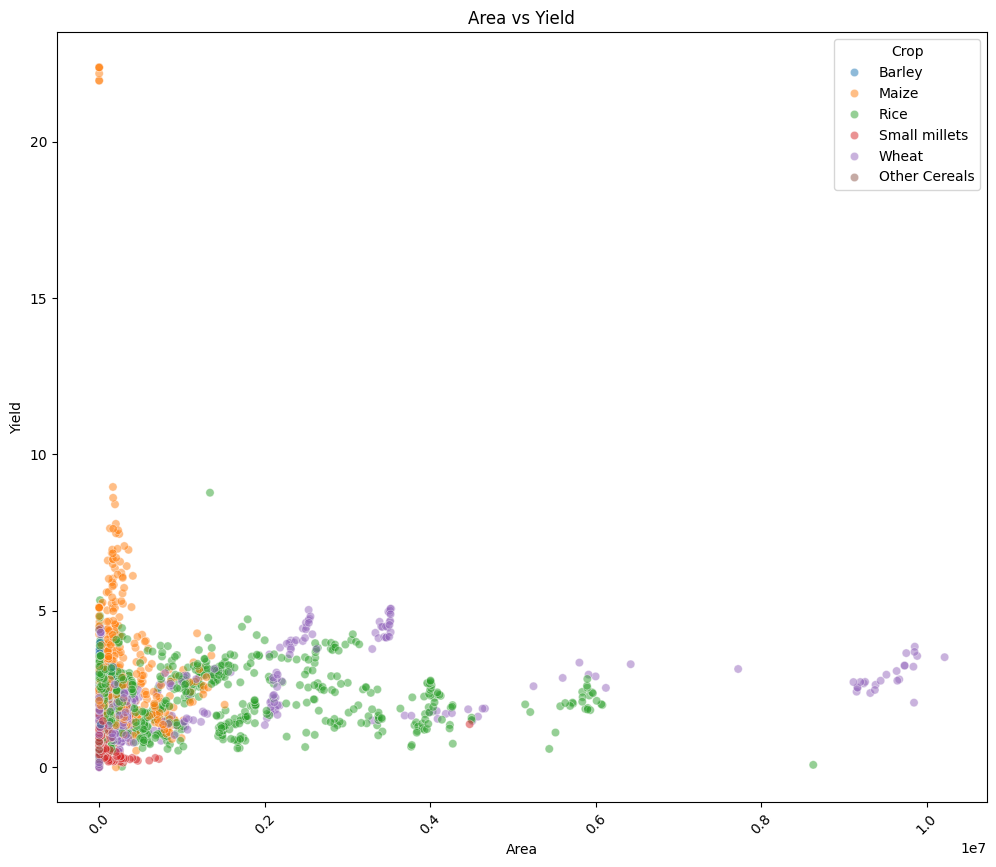

In [303]:
# Plotting Area vs Production

plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Area', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Area', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Area vs Yield')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


In [202]:
# Removing outliers

lower_percentile = 0.05
upper_percentile = 0.95
lower_bound = cereal_crop_yield['Yield'].quantile(lower_percentile)
upper_bound = cereal_crop_yield['Yield'].quantile(upper_percentile)
cereal_crop_yield = cereal_crop_yield[(cereal_crop_yield['Yield'] >= lower_bound) & (cereal_crop_yield['Yield'] <= upper_bound)]

lower_percentile = 0.05
upper_percentile = 0.95
lower_bound = cereal_crop_yield['Production'].quantile(lower_percentile)
upper_bound = cereal_crop_yield['Production'].quantile(upper_percentile)
cereal_crop_yield = cereal_crop_yield[(cereal_crop_yield['Production'] >= lower_bound) & (cereal_crop_yield['Production'] <= upper_bound)]

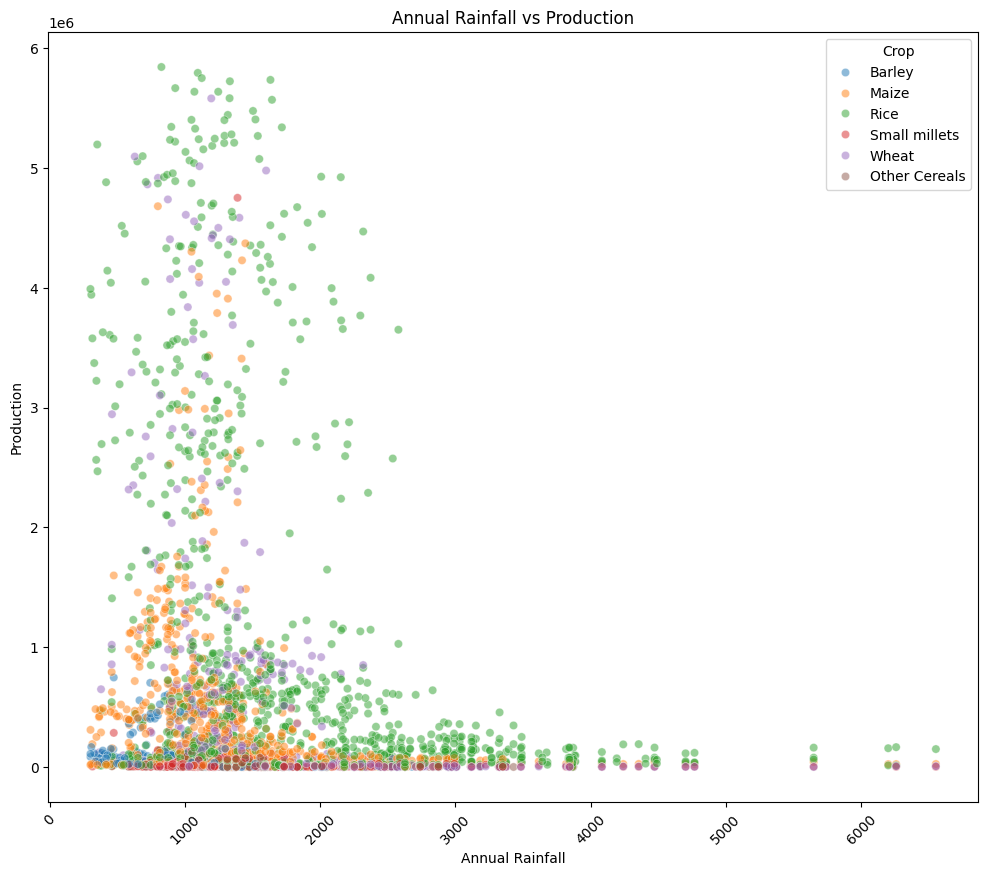

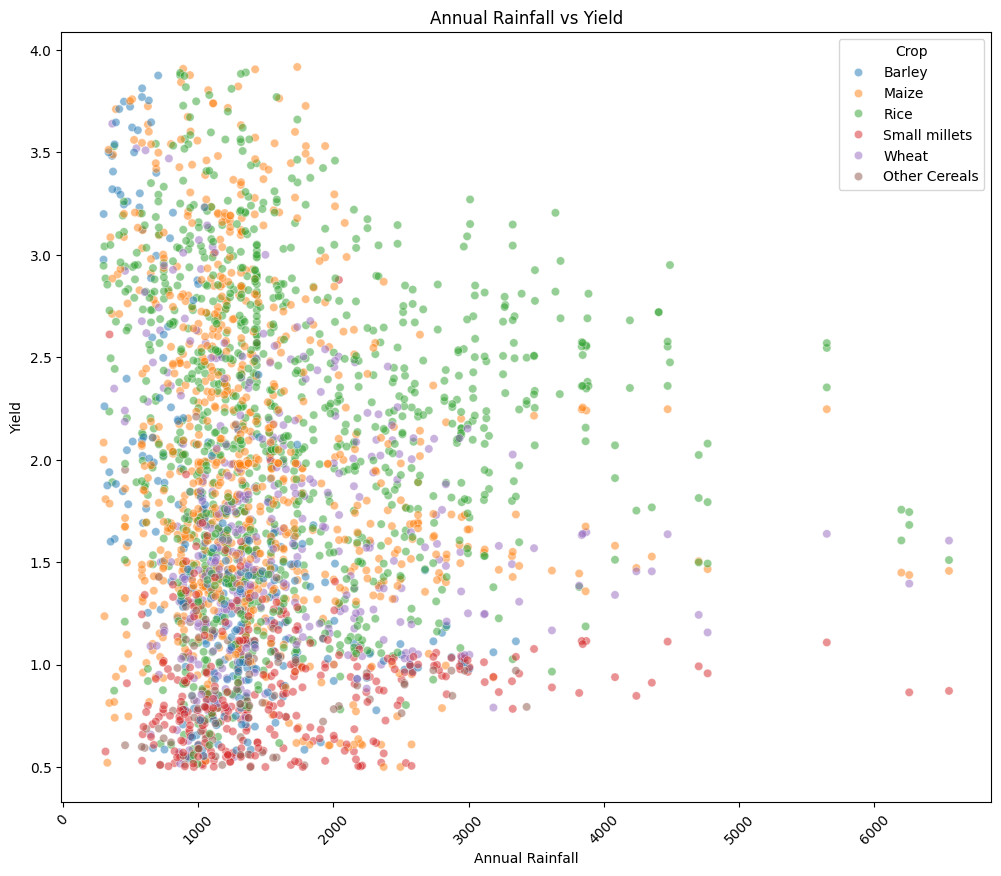

In [203]:
# Plotting rainfall vs production without outliers
plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Annual_Rainfall', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Annual Rainfall vs Production')
plt.xlabel('Annual Rainfall')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

# Plotting rainfall vs yield without outliers
plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Annual_Rainfall', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Annual Rainfall vs Yield')
plt.xlabel('Annual Rainfall')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


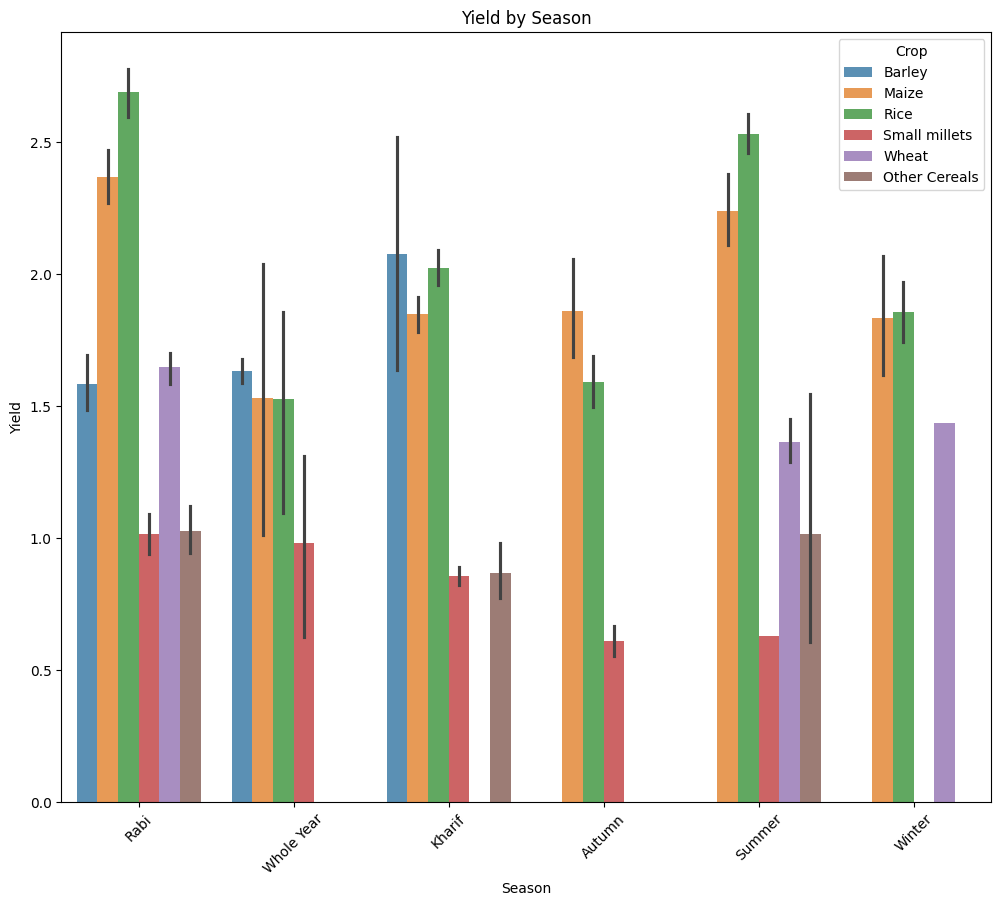

In [204]:
# Plotting yield by season without outliers

plt.figure(figsize = (12,10))
sns.barplot(data = cereal_crop_yield, x = 'Season', y = 'Yield', hue = 'Crop', alpha = 0.8)
plt.title('Yield by Season')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()

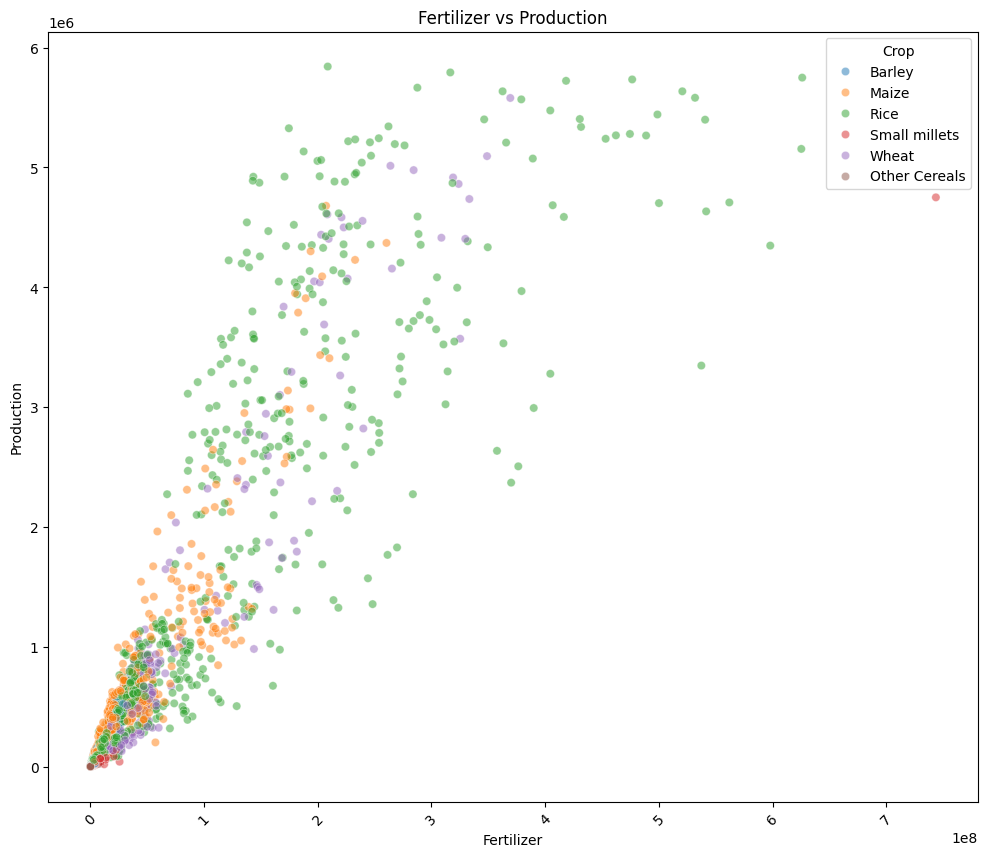

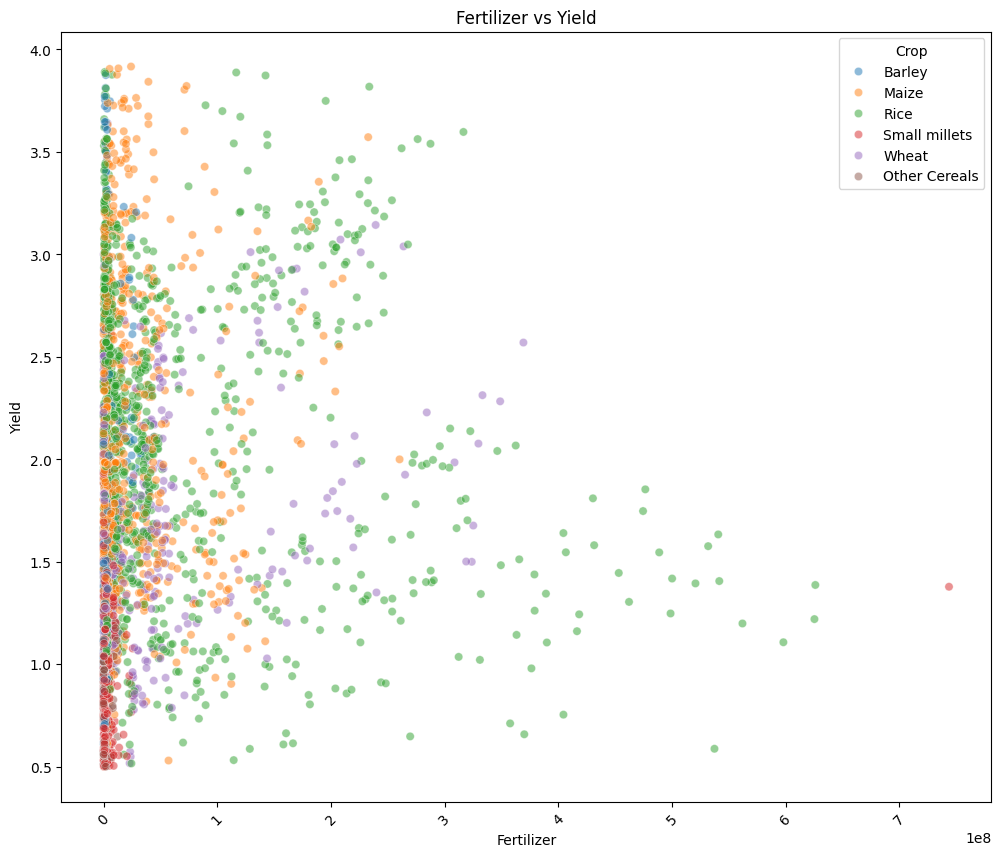

In [205]:
# Plotting fertilizer by production
plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Fertilizer', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Fertilizer vs Production')
plt.xlabel('Fertilizer')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

# Plotting fertilizer by yield

plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Fertilizer', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Fertilizer vs Yield')
plt.xlabel('Fertilizer')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


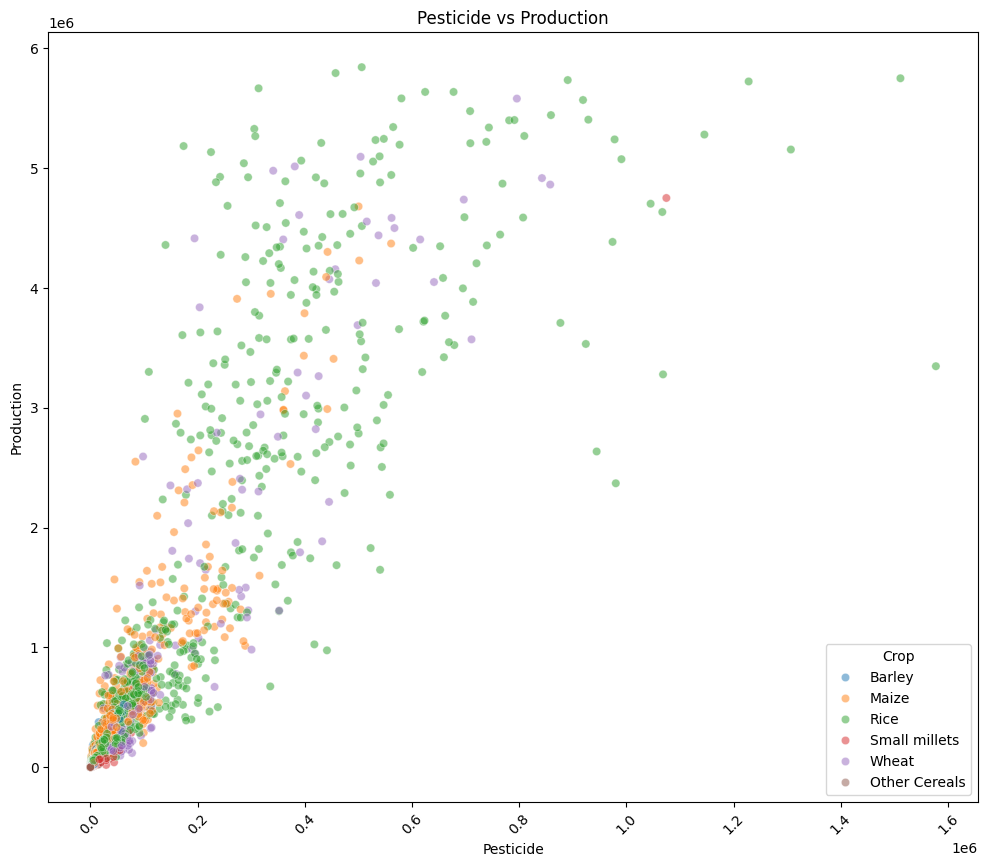

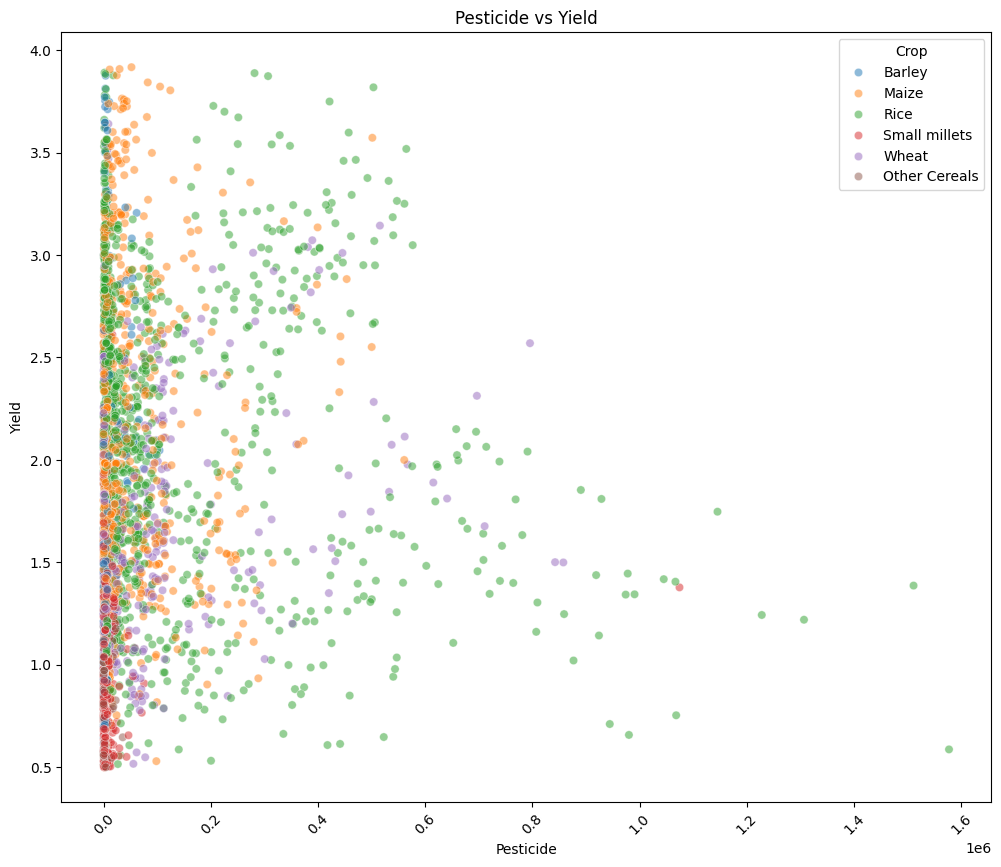

In [206]:
# Plotting pesticide vs Production
plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Pesticide', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Pesticide vs Production')
plt.xlabel('Pesticide')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

# Plotting pesticide vs yield

plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Pesticide', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Pesticide vs Yield')
plt.xlabel('Pesticide')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


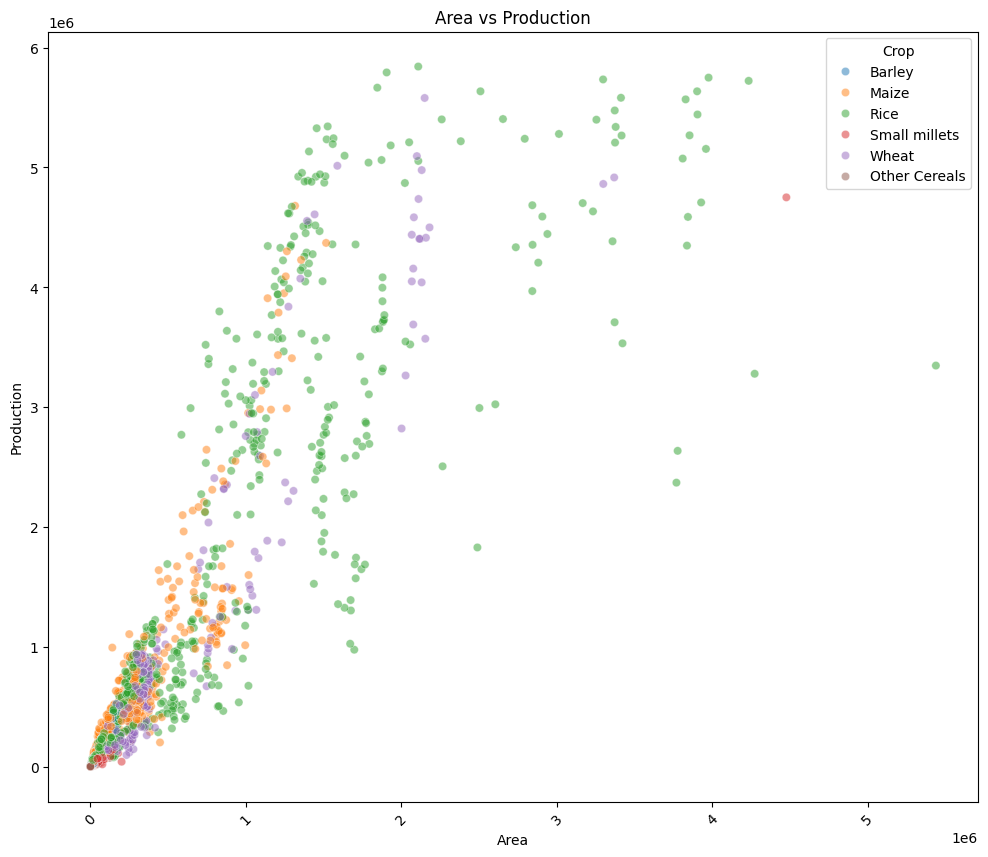

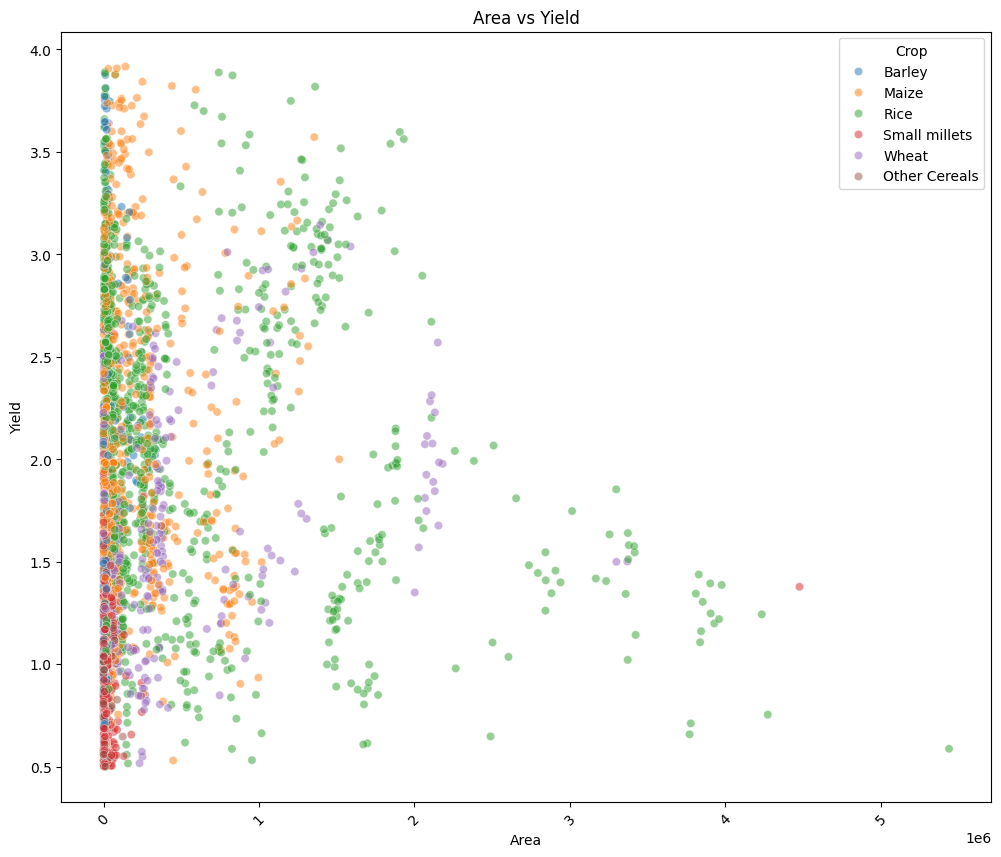

In [207]:
# Plotting area vs Production

plt.figure(figsize = (12,10))
sns.scatterplot(data = cereal_crop_yield, x = 'Area', y = 'Production', hue = 'Crop', alpha = 0.5)
plt.title('Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.xticks(rotation = 45)
plt.show()

# Plotting area vs yield

plt.figure(figsize = (12, 10))
sns.scatterplot(data = cereal_crop_yield, x = 'Area', y = 'Yield', hue = 'Crop', alpha = 0.5)
plt.title('Area vs Yield')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.xticks(rotation = 45)
plt.show()


In [304]:
# getting corr values

corr_vars = cereal_crop_yield[cereal_crop_yield.columns[cereal_crop_yield.dtypes != object]]
corr_matrix = corr_vars.corr()
corr_matrix

Crop_Year      Area  Production  Annual_Rainfall  Fertilizer  \
Crop_Year         1.000000 -0.034771    0.014905         0.002590    0.037734   
Area             -0.034771  1.000000    0.935511        -0.202634    0.978057   
Production        0.014905  0.935511    1.000000        -0.211302    0.937866   
Annual_Rainfall   0.002590 -0.202634   -0.211302         1.000000   -0.197172   
Fertilizer        0.037734  0.978057    0.937866        -0.197172    1.000000   
Pesticide         0.017010  0.962886    0.922562        -0.191567    0.961566   
Yield             0.158737  0.146373    0.242403        -0.143642    0.157361   

                 Pesticide     Yield  
Crop_Year         0.017010  0.158737  
Area              0.962886  0.146373  
Production        0.922562  0.242403  
Annual_Rainfall  -0.191567 -0.143642  
Fertilizer        0.961566  0.157361  
Pesticide         1.000000  0.154160  
Yield             0.154160  1.000000

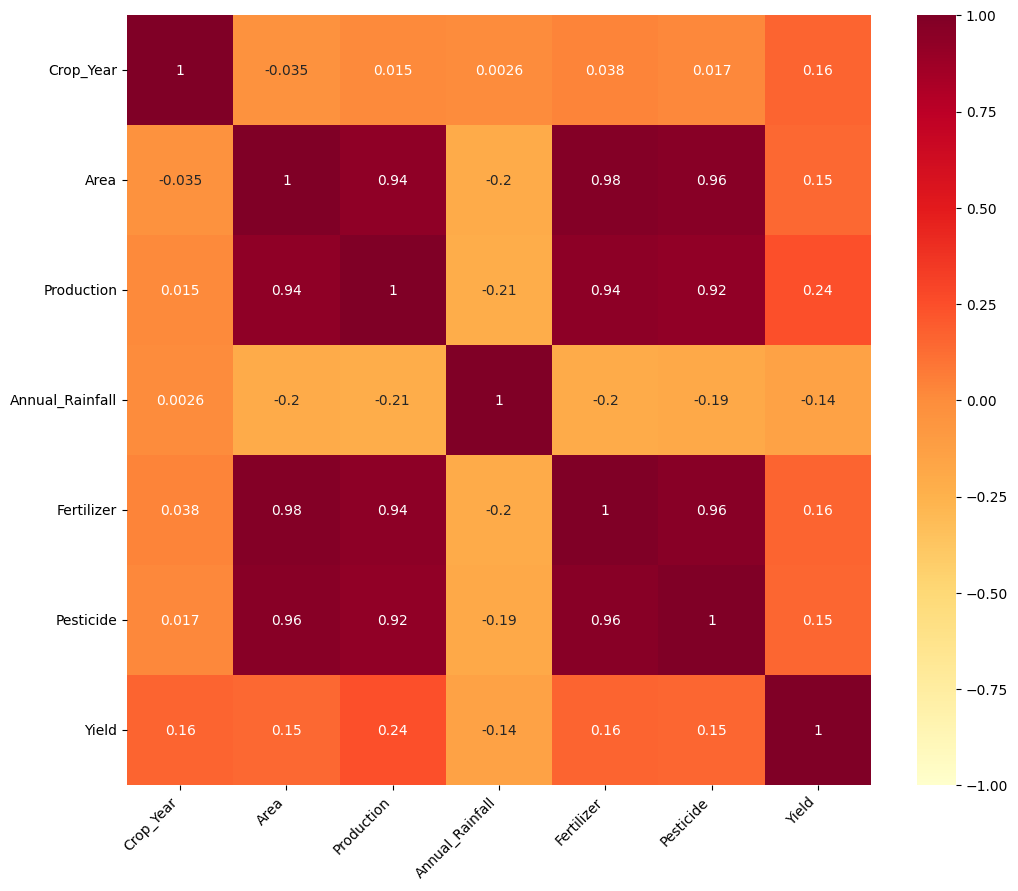

In [305]:
# corr heatmap

plt.figure(figsize = (12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 10}, cmap='YlOrRd', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()


In [210]:
# checking df

crop_yield

index            Crop  Crop_Year      Season        State      Area  \
0          0        Arecanut       1997  Whole Year        Assam   73814.0   
1         57        Arecanut       1997  Whole Year       Kerala   76145.0   
2         62        Arecanut       1997  Whole Year    Meghalaya    9569.0   
3         27        Arecanut       1997  Whole Year    Karnataka   93100.0   
4         88        Arecanut       1997  Whole Year  West Bengal    8058.0   
...      ...             ...        ...         ...          ...       ...   
19684  17347            Urad       2020      Kharif  Uttarakhand   12398.0   
19685  17348            Urad       2020      Summer  Uttarakhand      58.0   
19686  17349           Wheat       2020        Rabi  Uttarakhand  297189.0   
19687  17351  other oilseeds       2020        Rabi  Uttarakhand      30.0   
19688  17350  other oilseeds       2020      Kharif  Uttarakhand      13.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0           56708      2051.400000   7024878.38   22882.34  0.796087  
1           93995      3252.400000   7246719.65   23604.95  1.147857  
2           12116      3818.200000    910681.73    2966.39  1.245714  
3          133342      1266.700000   8860327.00   28861.00  1.293571  
4           12423      1852.900000    766879.86    2497.98  1.691765  
...           ...              ...          ...        ...       ...  
19684       13282      1313.947826   2400376.78    4587.26  1.120769  
19685          69      1313.947826     11229.38      21.46  1.193333  
19686      937003      1313.947826  57538762.29  109959.93  2.216154  
19687          21      1313.947826      5808.30      11.10  0.690000  
19688           9      1313.947826      2516.93       4.81  0.700000  

[19689 rows x 11 columns]

In [211]:
# reloading data without outliers filtered

csv = "C:\\Users\\rxh07\\Downloads\\IOD\\Capstone\\crop_yield.csv\\crop_yield.csv"
crop_yield = pd.read_csv(csv)
crop_yield

Crop  Crop_Year       Season              State      Area  \
0           Arecanut       1997  Whole Year               Assam   73814.0   
1          Arhar/Tur       1997  Kharif                   Assam    6637.0   
2        Castor seed       1997  Kharif                   Assam     796.0   
3           Coconut        1997  Whole Year               Assam   19656.0   
4       Cotton(lint)       1997  Kharif                   Assam    1739.0   
...              ...        ...          ...                ...       ...   
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide        Yield  
0           56708           2051.4   7024878.38   22882.34     0.796087  
1            4685           2051.4    631643.29    2057.47     0.710435  
2              22           2051.4     75755.32     246.76     0.238333  
3       126905000           2051.4   1870661.52    6093.36  5238.051739  
4             794           2051.4    165500.63     539.09     0.420909  
...           ...              ...          ...        ...          ...  
19684        2000           1498.0    395200.00    1160.00     0.500000  
19685        3000           1498.0     98800.00     290.00     3.000000  
19686      440900           1356.2  29586735.11   96373.73     1.285000  
19687        5488           1356.2  26242746.82   85481.26     0.016667  
19688      392160           1356.2  22778368.48   74196.64     1.261818  

[19689 rows x 10 columns]

In [212]:
# reloading df without outliers filtered

crop_yield = crop_yield.sort_values(by = ['Crop_Year', 'Crop', 'Yield'])
crop_yield

Crop  Crop_Year       Season        State      Area  \
0            Arecanut       1997  Whole Year         Assam   73814.0   
57           Arecanut       1997  Whole Year        Kerala   76145.0   
62           Arecanut       1997  Whole Year     Meghalaya    9569.0   
27           Arecanut       1997  Whole Year     Karnataka   93100.0   
88           Arecanut       1997  Whole Year   West Bengal    8058.0   
...               ...        ...          ...          ...       ...   
17347            Urad       2020  Kharif       Uttarakhand   12398.0   
17348            Urad       2020  Summer       Uttarakhand      58.0   
17349           Wheat       2020  Rabi         Uttarakhand  297189.0   
17351  other oilseeds       2020  Rabi         Uttarakhand      30.0   
17350  other oilseeds       2020  Kharif       Uttarakhand      13.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0           56708      2051.400000   7024878.38   22882.34  0.796087  
57          93995      3252.400000   7246719.65   23604.95  1.147857  
62          12116      3818.200000    910681.73    2966.39  1.245714  
27         133342      1266.700000   8860327.00   28861.00  1.293571  
88          12423      1852.900000    766879.86    2497.98  1.691765  
...           ...              ...          ...        ...       ...  
17347       13282      1313.947826   2400376.78    4587.26  1.120769  
17348          69      1313.947826     11229.38      21.46  1.193333  
17349      937003      1313.947826  57538762.29  109959.93  2.216154  
17351          21      1313.947826      5808.30      11.10  0.690000  
17350           9      1313.947826      2516.93       4.81  0.700000  

[19689 rows x 10 columns]

In [213]:
# reloading data without outliers filtered
# resetting index

crop_yield.reset_index(inplace = True)
crop_yield

index            Crop  Crop_Year       Season        State      Area  \
0          0        Arecanut       1997  Whole Year         Assam   73814.0   
1         57        Arecanut       1997  Whole Year        Kerala   76145.0   
2         62        Arecanut       1997  Whole Year     Meghalaya    9569.0   
3         27        Arecanut       1997  Whole Year     Karnataka   93100.0   
4         88        Arecanut       1997  Whole Year   West Bengal    8058.0   
...      ...             ...        ...          ...          ...       ...   
19684  17347            Urad       2020  Kharif       Uttarakhand   12398.0   
19685  17348            Urad       2020  Summer       Uttarakhand      58.0   
19686  17349           Wheat       2020  Rabi         Uttarakhand  297189.0   
19687  17351  other oilseeds       2020  Rabi         Uttarakhand      30.0   
19688  17350  other oilseeds       2020  Kharif       Uttarakhand      13.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0           56708      2051.400000   7024878.38   22882.34  0.796087  
1           93995      3252.400000   7246719.65   23604.95  1.147857  
2           12116      3818.200000    910681.73    2966.39  1.245714  
3          133342      1266.700000   8860327.00   28861.00  1.293571  
4           12423      1852.900000    766879.86    2497.98  1.691765  
...           ...              ...          ...        ...       ...  
19684       13282      1313.947826   2400376.78    4587.26  1.120769  
19685          69      1313.947826     11229.38      21.46  1.193333  
19686      937003      1313.947826  57538762.29  109959.93  2.216154  
19687          21      1313.947826      5808.30      11.10  0.690000  
19688           9      1313.947826      2516.93       4.81  0.700000  

[19689 rows x 11 columns]

In [214]:
# reloading data without outliers filtered
# stripping whitespace

crop_yield = crop_yield.applymap(lambda x: x.strip() if isinstance(x, str) else x)
crop_yield['Season'].unique()

WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\AppData\Local\Temp\ipykernel_20780\2306578164.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  crop_yield = crop_yield.applymap(lambda x: x.strip() if isinstance(x, str) else x)



array(['Whole Year', 'Kharif', 'Winter', 'Autumn', 'Summer', 'Rabi'],
      dtype=object)

In [306]:
# creating filtered cereal df

cereal_crops = ['Barley', 'Rice', 'Maize', 'Wheat', 'Small millets', 'Other Cereals']
cereal_crop_yield = crop_yield[crop_yield['Crop'].isin(cereal_crops)]
cereal_crop_yield.reset_index(inplace = True)
cereal_crop_yield.drop(columns = ['level_0', 'index'], inplace = True)
cereal_crop_yield

WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\AppData\Local\Temp\ipykernel_20780\1606804936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal_crop_yield.drop(columns = ['level_0', 'index'], inplace = True)



Crop  Crop_Year      Season           State      Area  \
0            Barley       1997        Rabi           Bihar   42838.0   
1            Barley       1997        Rabi          Sikkim    1310.0   
2            Barley       1997        Rabi  Madhya Pradesh   91200.0   
3            Barley       1997  Whole Year     West Bengal    6116.0   
4            Barley       1997        Rabi   Uttar Pradesh  337037.0   
...             ...        ...         ...             ...       ...   
3640  Other Cereals       2020        Rabi     Uttarakhand     411.0   
3641           Rice       2020      Kharif     Uttarakhand  241936.0   
3642           Rice       2020      Summer     Uttarakhand   15315.0   
3643  Small millets       2020      Kharif     Uttarakhand   44769.0   
3644          Wheat       2020        Rabi     Uttarakhand  297189.0   

      Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
0          44140      1303.700000   4076892.46   13279.78  1.040000  
1           1510      2804.100000    124672.70     406.10  1.155000  
2         110500      1189.100000   8679504.00   28272.00  1.347097  
3           5034      1852.900000    582059.72    1895.96  1.680000  
4         747044       473.900000  32075811.29  104481.47  2.046329  
...          ...              ...          ...        ...       ...  
3640         333      1313.947826     79573.71     152.07  0.808000  
3641      669372      1313.947826  46841228.96   89516.32  2.093077  
3642       55057      1313.947826   2965137.15    5666.55  3.563333  
3643       65289      1313.947826   8667726.09   16564.53  1.480909  
3644      937003      1313.947826  57538762.29  109959.93  2.216154  

[3645 rows x 10 columns]

In [307]:
# removing outlier

maize_crop_yield = cereal_crop_yield[cereal_crop_yield['Crop'] == 'Maize']
maize_crop_yield.max()

maize_crop_yield[maize_crop_yield['Yield'] == 989.87].index

Index([38], dtype='int64')

In [308]:
# removing outlier

cereal_crop_yield.iloc[38]
cereal_crop_yield = cereal_crop_yield.drop(index = 38)

In [309]:
# checking years

cereal_crop_yield['Crop_Year'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [313]:
# creating training set with years 1997-2015

cereal_crop_yield_train_years = cereal_crop_yield[cereal_crop_yield['Crop_Year'] <= 2015]
cereal_crop_yield_train_years

Crop  Crop_Year      Season           State       Area  Production  \
0     Barley       1997        Rabi           Bihar    42838.0       44140   
1     Barley       1997        Rabi          Sikkim     1310.0        1510   
2     Barley       1997        Rabi  Madhya Pradesh    91200.0      110500   
3     Barley       1997  Whole Year     West Bengal     6116.0        5034   
4     Barley       1997        Rabi   Uttar Pradesh   337037.0      747044   
...      ...        ...         ...             ...        ...         ...   
2862   Wheat       2015        Rabi       Telangana     4952.0       16902   
2863   Wheat       2015        Rabi  Madhya Pradesh  5914000.0    18408000   
2864   Wheat       2015        Rabi         Haryana  2576000.0    11350000   
2865   Wheat       2015        Rabi           Delhi    19050.0       83419   
2866   Wheat       2015        Rabi          Punjab  3508000.0    16077000   

      Annual_Rainfall    Fertilizer   Pesticide     Yield  
0              1303.7  4.076892e+06    13279.78  1.040000  
1              2804.1  1.246727e+05      406.10  1.155000  
2              1189.1  8.679504e+06    28272.00  1.347097  
3              1852.9  5.820597e+05     1895.96  1.680000  
4               473.9  3.207581e+07   104481.47  2.046329  
...               ...           ...         ...       ...  
2862            747.9  7.819703e+05     1634.16  2.947500  
2863           1000.7  9.338797e+08  1951620.00  2.961373  
2864            426.8  4.067762e+08   850080.00  4.252857  
2865            757.7  3.008186e+06     6286.50  4.380000  
2866            512.6  5.539483e+08  1157640.00  4.552273  

[2866 rows x 10 columns]

In [314]:
# creating testing set with years 2016-2020

cereal_crop_yield_test_years = cereal_crop_yield[cereal_crop_yield['Crop_Year'] >= 2016]
cereal_crop_yield_test_years

Crop  Crop_Year  Season              State      Area  \
2867         Barley       2016  Kharif  Jammu and Kashmir     189.0   
2868         Barley       2016    Rabi  Jammu and Kashmir    6571.0   
2869         Barley       2016    Rabi   Himachal Pradesh   19943.0   
2870         Barley       2016    Rabi       Chhattisgarh    2065.0   
2871         Barley       2016    Rabi             Sikkim     453.0   
...             ...        ...     ...                ...       ...   
3640  Other Cereals       2020    Rabi        Uttarakhand     411.0   
3641           Rice       2020  Kharif        Uttarakhand  241936.0   
3642           Rice       2020  Summer        Uttarakhand   15315.0   
3643  Small millets       2020  Kharif        Uttarakhand   44769.0   
3644          Wheat       2020    Rabi        Uttarakhand  297189.0   

      Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
2867          67       902.800000     28964.25      66.15  0.350000  
2868        4205       902.800000   1007005.75    2299.85  0.778750  
2869       18125      1373.900000   3056264.75    6980.05  0.925455  
2870        1879      1298.900000    316461.25     722.75  0.964286  
2871         481      2971.600000     69422.25     158.55  1.010000  
...          ...              ...          ...        ...       ...  
3640         333      1313.947826     79573.71     152.07  0.808000  
3641      669372      1313.947826  46841228.96   89516.32  2.093077  
3642       55057      1313.947826   2965137.15    5666.55  3.563333  
3643       65289      1313.947826   8667726.09   16564.53  1.480909  
3644      937003      1313.947826  57538762.29  109959.93  2.216154  

[778 rows x 10 columns]

Mean Squared Error (Training): 0.1013664516666539
Mean Squared Error (Testing): 0.4533392409165381
Root Mean Squared Error (Training): 0.3183809850896468
Root Mean Squared Error (Testing): 0.6733047162440926
Mean Absolute Error (Training): 0.1363377653098512
Mean Absolute Error (Testing): 0.24485186309978044
R² (Training): 0.9451352636404303
R² (Testing): 0.8103838159029579
Adjusted R² (Training): 0.944943008760502
Adjusted R² (Testing): 0.8076989849776901


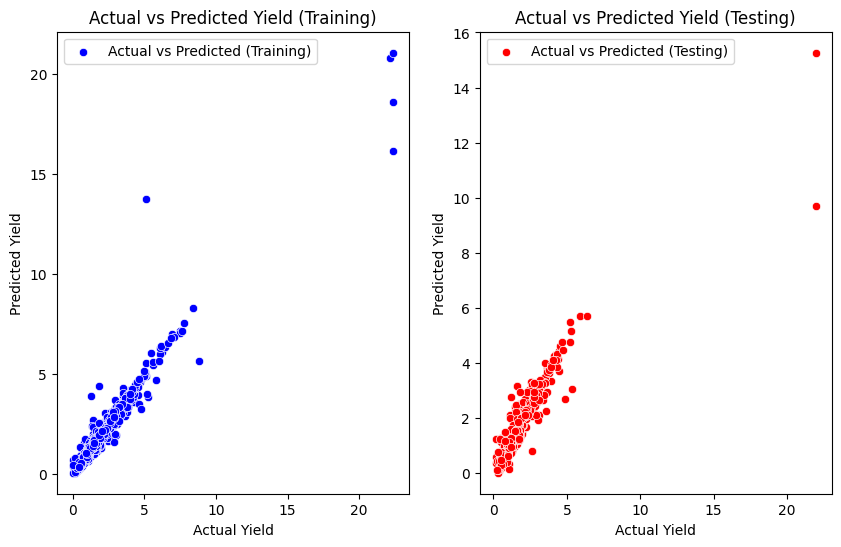

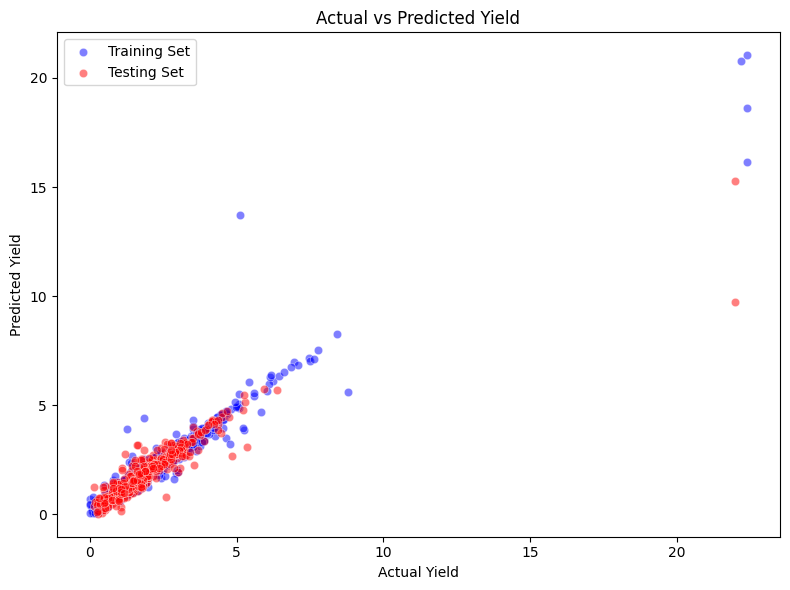

<Figure size 640x480 with 0 Axes>

In [377]:
# Creating model

'''
WITHOUT RAINFALL, WITH STATE, alpha = 0.0001, 2 hidden layers, 100 nodes, 200 iters
'''

# Separate features and target variable
X = cereal_crop_year_train_years.drop(['Yield', 'Annual_Rainfall'], axis=1)
y = cereal_crop_year_train_years['Yield']

# Define data preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Crop', 'Season', 'State']),  # One-hot encode categorical features
        ('num', StandardScaler(), ['Area', 'Production', 'Crop_Year', 'Fertilizer', 'Pesticide'])  # Standardize numerical features
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Define neural network with L2 regularization
def create_neural_network_l2(num_hidden_layers=2, num_neurons=100, activation='relu', max_iter=200, alpha=0.0001):
    hidden_layer_sizes = tuple([num_neurons] * num_hidden_layers)  # Define the hidden layer sizes
    return MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=max_iter, alpha=alpha, random_state=42)

# Scale the target variable
target_scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on the training target variable
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# Transform the test target variable
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Create a pipeline with the preprocessor and the neural network model with L2 regularization
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Data preprocessing
    ('regressor', create_neural_network_l2(num_hidden_layers=2, max_iter=200, alpha=0.0001))  # Neural network model with L2 regularization
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_scaled)

# Predict on the training and testing data
y_train_pred_scaled = pipeline.predict(X_train)
y_test_pred_scaled = pipeline.predict(X_test)

# Inverse transform the predictions to get the original scale
y_train_pred = target_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = adjusted_r2(r2_train, n_train, p)

n_test = X_test.shape[0]
adjusted_r2_test = adjusted_r2(r2_test, n_test, p)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)
print("Root Mean Squared Error (Training):", rmse_train)
print("Root Mean Squared Error (Testing):", rmse_test)
print("Mean Absolute Error (Training):", mae_train)
print("Mean Absolute Error (Testing):", mae_test)
print("R² (Training):", r2_train)
print("R² (Testing):", r2_test)
print("Adjusted R² (Training):", adjusted_r2_train)
print("Adjusted R² (Testing):", adjusted_r2_test)

# Plot the actual vs predicted yield for training and testing data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (Training)')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Actual vs Predicted (Testing)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (Testing)')
plt.legend()

plt.figure(figsize=(8, 6))

# Plot actual vs predicted for training and testing set on same graph
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Training Set', alpha = 0.5)

sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Testing Set', alpha = 0.5)

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.legend()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()



In [342]:
# saving trained model

joblib.dump(pipeline, 'trained_model.pkl')

['trained_model.pkl']

In [343]:
# loading trained model

joblib.dump(target_scaler, 'target_scaler.pkl')

['target_scaler.pkl']

Mean Squared Error (New Data): 0.8828524578235046
Root Mean Squared Error (New Data): 0.9396022870467614
Mean Absolute Error (New Data): 0.6447004724324318
R² (New Data): 0.4509001119345817
Adjusted R² (New Data): 0.44518775939293875


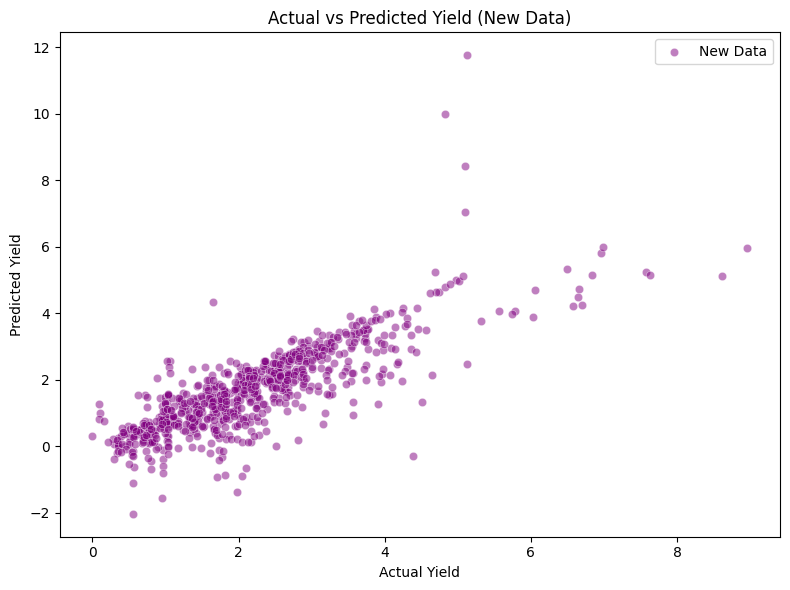

WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\AppData\Local\Temp\ipykernel_20780\4140813408.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal_crop_year_test_years['Predicted_Yield'] = new_predictions



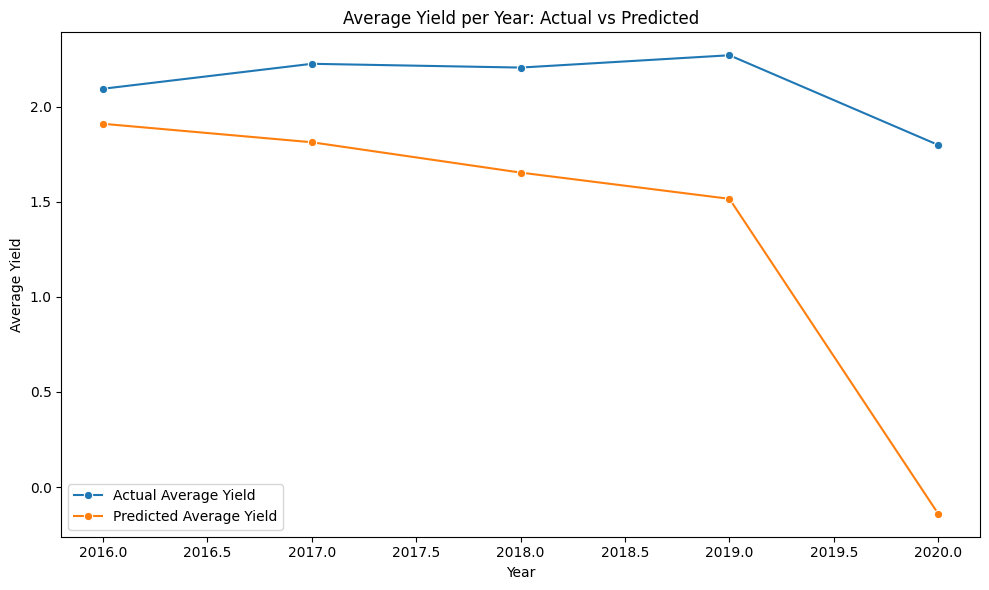

In [367]:
# Creating model

# Load the model and scaler
model = joblib.load('trained_model.pkl')
target_scaler = joblib.load('target_scaler.pkl')

# Prepare new data
X_new = cereal_crop_year_test_years.drop(['Yield', 'Annual_Rainfall'], axis=1)
y_new_actual = cereal_crop_year_test_years['Yield']

# Predict on new data
new_predictions_scaled = model.predict(X_new)
new_predictions = target_scaler.inverse_transform(new_predictions_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mse_new = mean_squared_error(y_new_actual, new_predictions)
rmse_new = np.sqrt(mse_new)
mae_new = mean_absolute_error(y_new_actual, new_predictions)
r2_new = r2_score(y_new_actual, new_predictions)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_new = X_new.shape[0]
p = X_new.shape[1]
adjusted_r2_new = adjusted_r2(r2_new, n_new, p)

print("Mean Squared Error (New Data):", mse_new)
print("Root Mean Squared Error (New Data):", rmse_new)
print("Mean Absolute Error (New Data):", mae_new)
print("R² (New Data):", r2_new)
print("Adjusted R² (New Data):", adjusted_r2_new)

# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_new_actual, y=new_predictions, color='purple', label='New Data', alpha=0.5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield (New Data)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate average yield for each year for actual and predicted data
cereal_crop_year_test_years['Predicted_Yield'] = new_predictions

actual_avg_yield_per_year = cereal_crop_year_test_years.groupby('Crop_Year')['Yield'].mean()
predicted_avg_yield_per_year = cereal_crop_year_test_years.groupby('Crop_Year')['Predicted_Yield'].mean()

# Create a DataFrame to store the averages
avg_yield_per_year = pd.DataFrame({
    'Actual_Avg_Yield': actual_avg_yield_per_year,
    'Predicted_Avg_Yield': predicted_avg_yield_per_year
}).reset_index()

# Plot the average yield for each year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Actual_Avg_Yield', data=avg_yield_per_year, marker='o', label='Actual Average Yield')
sns.lineplot(x='Crop_Year', y='Predicted_Avg_Yield', data=avg_yield_per_year, marker='o', label='Predicted Average Yield')

plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Average Yield per Year: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


In [315]:
# checking df
cereal_crop_yield_train_years

Crop  Crop_Year      Season           State       Area  Production  \
0     Barley       1997        Rabi           Bihar    42838.0       44140   
1     Barley       1997        Rabi          Sikkim     1310.0        1510   
2     Barley       1997        Rabi  Madhya Pradesh    91200.0      110500   
3     Barley       1997  Whole Year     West Bengal     6116.0        5034   
4     Barley       1997        Rabi   Uttar Pradesh   337037.0      747044   
...      ...        ...         ...             ...        ...         ...   
2862   Wheat       2015        Rabi       Telangana     4952.0       16902   
2863   Wheat       2015        Rabi  Madhya Pradesh  5914000.0    18408000   
2864   Wheat       2015        Rabi         Haryana  2576000.0    11350000   
2865   Wheat       2015        Rabi           Delhi    19050.0       83419   
2866   Wheat       2015        Rabi          Punjab  3508000.0    16077000   

      Annual_Rainfall    Fertilizer   Pesticide     Yield  
0              1303.7  4.076892e+06    13279.78  1.040000  
1              2804.1  1.246727e+05      406.10  1.155000  
2              1189.1  8.679504e+06    28272.00  1.347097  
3              1852.9  5.820597e+05     1895.96  1.680000  
4               473.9  3.207581e+07   104481.47  2.046329  
...               ...           ...         ...       ...  
2862            747.9  7.819703e+05     1634.16  2.947500  
2863           1000.7  9.338797e+08  1951620.00  2.961373  
2864            426.8  4.067762e+08   850080.00  4.252857  
2865            757.7  3.008186e+06     6286.50  4.380000  
2866            512.6  5.539483e+08  1157640.00  4.552273  

[2866 rows x 10 columns]

In [316]:
# checking crops
cereal_crop_yield_train_years['Crop'].unique()

array(['Barley', 'Maize', 'Rice', 'Small millets', 'Wheat',
       'Other Cereals'], dtype=object)

In [325]:
# creating df with only "dry season" crops
dry_season_crops_train = cereal_crop_yield_train_years[(cereal_crop_yield_train_years['Crop'] == 'Barley') | (cereal_crop_yield_train_years['Crop'] == 'Wheat')]

#creating training set with only dry season crops
dry_season_crops_train

Crop  Crop_Year      Season           State       Area  Production  \
0     Barley       1997        Rabi           Bihar    42838.0       44140   
1     Barley       1997        Rabi          Sikkim     1310.0        1510   
2     Barley       1997        Rabi  Madhya Pradesh    91200.0      110500   
3     Barley       1997  Whole Year     West Bengal     6116.0        5034   
4     Barley       1997        Rabi   Uttar Pradesh   337037.0      747044   
...      ...        ...         ...             ...        ...         ...   
2862   Wheat       2015        Rabi       Telangana     4952.0       16902   
2863   Wheat       2015        Rabi  Madhya Pradesh  5914000.0    18408000   
2864   Wheat       2015        Rabi         Haryana  2576000.0    11350000   
2865   Wheat       2015        Rabi           Delhi    19050.0       83419   
2866   Wheat       2015        Rabi          Punjab  3508000.0    16077000   

      Annual_Rainfall    Fertilizer   Pesticide     Yield  
0              1303.7  4.076892e+06    13279.78  1.040000  
1              2804.1  1.246727e+05      406.10  1.155000  
2              1189.1  8.679504e+06    28272.00  1.347097  
3              1852.9  5.820597e+05     1895.96  1.680000  
4               473.9  3.207581e+07   104481.47  2.046329  
...               ...           ...         ...       ...  
2862            747.9  7.819703e+05     1634.16  2.947500  
2863           1000.7  9.338797e+08  1951620.00  2.961373  
2864            426.8  4.067762e+08   850080.00  4.252857  
2865            757.7  3.008186e+06     6286.50  4.380000  
2866            512.6  5.539483e+08  1157640.00  4.552273  

[678 rows x 10 columns]

In [326]:
# creating df with only "wet season" crops
wet_season_crops_train = cereal_crop_yield_train_years[(cereal_crop_yield_train_years['Crop'] != 'Barley') & (cereal_crop_yield_train_years['Crop'] != 'Wheat')]

#creating training set with only wet season crops
wet_season_crops_train

Crop  Crop_Year      Season        State     Area  Production  \
7             Maize       1997      Kharif        Assam  19216.0       14721   
8             Maize       1997  Whole Year       Sikkim   9580.0        7605   
9             Maize       1997      Autumn       Odisha  51349.0       63331   
10            Maize       1997      Summer       Odisha   1164.0         978   
11            Maize       1997      Winter       Odisha    144.0         136   
...             ...        ...         ...          ...      ...         ...   
2836  Small millets       2015      Kharif   Tamil Nadu  22406.0       31304   
2837  Small millets       2015        Rabi      Gujarat  14582.0       18735   
2838  Small millets       2015      Kharif  Uttarakhand  56570.0       72632   
2839  Small millets       2015        Rabi   Tamil Nadu    758.0        1200   
2840  Small millets       2015      Kharif   Puducherry      8.0          13   

      Annual_Rainfall  Fertilizer  Pesticide     Yield  
7              2051.4  1828786.72    5956.96  0.615652  
8              2804.1   911728.60    2969.80  0.787500  
9              1496.6  4886884.33   15918.19  0.812000  
10             1496.6   110777.88     360.84  0.945714  
11             1496.6    13704.48      44.64  0.992500  
...               ...         ...        ...       ...  
2836           1201.9  3538131.46    7393.98  1.206957  
2837            584.3  2302643.62    4812.06  1.245000  
2838           1247.6  8932968.70   18668.10  1.283636  
2839           1201.9   119695.78     250.14  1.558750  
2840           1980.6     1263.28       2.64  1.630000  

[2188 rows x 10 columns]

In [330]:
# creating 'dry season' test 
dry_season_crops_test = cereal_crop_yield_test_years[(cereal_crop_yield_test_years['Crop'] == 'Barley') | (cereal_crop_yield_test_years['Crop'] == 'Wheat')]

#creating testing set with only dry season crops
dry_season_crops_test

Crop  Crop_Year  Season              State       Area  Production  \
2867  Barley       2016  Kharif  Jammu and Kashmir      189.0          67   
2868  Barley       2016    Rabi  Jammu and Kashmir     6571.0        4205   
2869  Barley       2016    Rabi   Himachal Pradesh    19943.0       18125   
2870  Barley       2016    Rabi       Chhattisgarh     2065.0        1879   
2871  Barley       2016    Rabi             Sikkim      453.0         481   
...      ...        ...     ...                ...        ...         ...   
3633   Wheat       2019    Rabi              Delhi    19228.0       82905   
3634   Wheat       2019    Rabi            Haryana  2533800.0    11876900   
3635   Wheat       2019    Rabi             Punjab  3521000.0    17619000   
3636  Barley       2020    Rabi        Uttarakhand    19280.0       24479   
3644   Wheat       2020    Rabi        Uttarakhand   297189.0      937003   

      Annual_Rainfall    Fertilizer   Pesticide     Yield  
2867       902.800000  2.896425e+04       66.15  0.350000  
2868       902.800000  1.007006e+06     2299.85  0.778750  
2869      1373.900000  3.056265e+06     6980.05  0.925455  
2870      1298.900000  3.164612e+05      722.75  0.964286  
2871      2971.600000  6.942225e+04      158.55  1.010000  
...               ...           ...         ...       ...  
3633       546.900000  3.302601e+06     7114.36  4.310000  
3634       351.800000  4.352055e+08   937506.00  4.618182  
3635       653.200000  6.047670e+08  1302770.00  4.892273  
3636      1313.947826  3.732801e+06     7133.60  1.366923  
3644      1313.947826  5.753876e+07   109959.93  2.216154  

[164 rows x 10 columns]

In [331]:
# creating 'wet season' test 
wet_season_crops_test = cereal_crop_yield_test_years[(cereal_crop_yield_test_years['Crop'] != 'Barley') & (cereal_crop_yield_test_years['Crop'] != 'Wheat')]

#creating testing set with only wet season crops
wet_season_crops_test

Crop  Crop_Year  Season              State      Area  \
2881          Maize       2016  Kharif            Tripura   12196.0   
2882          Maize       2016  Winter             Odisha    1344.0   
2883          Maize       2016    Rabi            Tripura    2500.0   
2884          Maize       2016  Kharif        Uttarakhand   21692.0   
2885          Maize       2016  Kharif  Arunachal Pradesh   50300.0   
...             ...        ...     ...                ...       ...   
3639  Other Cereals       2020  Kharif        Uttarakhand     623.0   
3640  Other Cereals       2020    Rabi        Uttarakhand     411.0   
3641           Rice       2020  Kharif        Uttarakhand  241936.0   
3642           Rice       2020  Summer        Uttarakhand   15315.0   
3643  Small millets       2020  Kharif        Uttarakhand   44769.0   

      Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
2881       16608      2475.300000   1869037.00    4268.60  1.383750  
2882        1736      1460.500000    205968.00     470.40  1.541818  
2883        3887      2475.300000    383125.00     875.00  1.560000  
2884       36649      1580.900000   3324299.00    7592.20  1.570000  
2885       75450      2933.700000   7708475.00   17605.00  1.584000  
...          ...              ...          ...        ...       ...  
3639         350      1313.947826    120619.03     230.51  0.558571  
3640         333      1313.947826     79573.71     152.07  0.808000  
3641      669372      1313.947826  46841228.96   89516.32  2.093077  
3642       55057      1313.947826   2965137.15    5666.55  3.563333  
3643       65289      1313.947826   8667726.09   16564.53  1.480909  

[614 rows x 10 columns]

Mean Squared Error (Training): 0.027071230872725203
Mean Squared Error (Testing): 0.2209226772247321
Root Mean Squared Error (Training): 0.16453337312753666
Root Mean Squared Error (Testing): 0.47002412408804306
Mean Absolute Error (Training): 0.104800464697849
Mean Absolute Error (Testing): 0.24551341158336837
R² (Training): 0.9728289752709266
R² (Testing): 0.7991721414114965
Adjusted R² (Training): 0.9724211550123288
Adjusted R² (Testing): 0.786521567642142


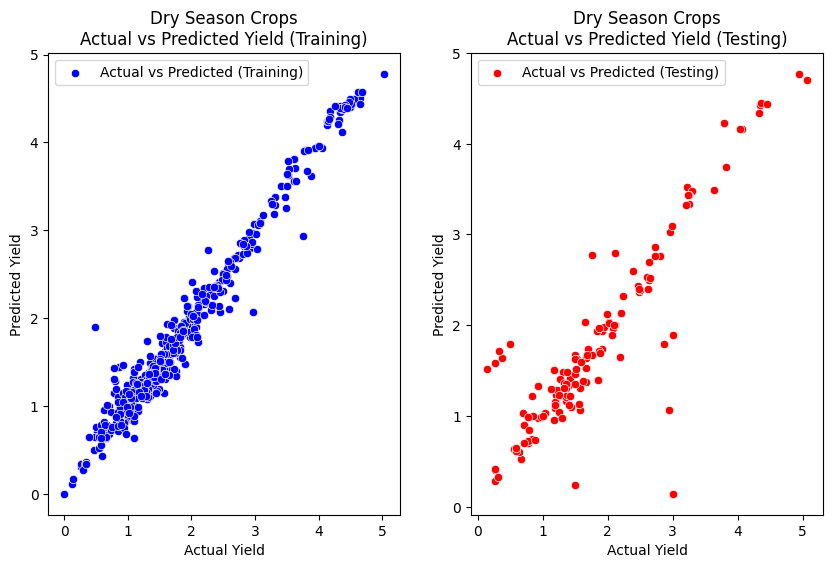

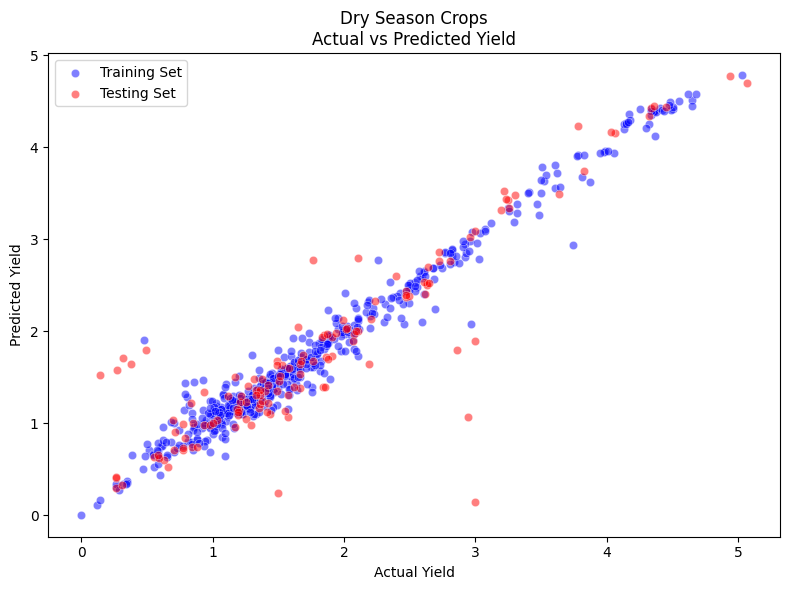

<Figure size 640x480 with 0 Axes>

In [364]:
# create model for dry season

'''
DRY SEASON CROPS
WITHOUT RAINFALL, WITH STATE, alpha = 0.0001, 2 hidden layers, 100 nodes, 200 iters
'''

# Separate features and target variable
X = dry_season_crops_train.drop(['Yield', 'Annual_Rainfall'], axis=1)
y = dry_season_crops_train['Yield']

# Define data preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Crop', 'Season', 'State']),  # One-hot encode categorical features
        ('num', StandardScaler(), ['Area', 'Production', 'Crop_Year', 'Fertilizer', 'Pesticide'])  # Standardize numerical features
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Define neural network with L2 regularization
def create_neural_network_l2(num_hidden_layers=2, num_neurons=100, activation='relu', max_iter=200, alpha=0.0001):
    hidden_layer_sizes = tuple([num_neurons] * num_hidden_layers)  # Define the hidden layer sizes
    return MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=max_iter, alpha=alpha, random_state=42)

# Scale the target variable
target_scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on the training target variable
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# Transform the test target variable
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Create a pipeline with the preprocessor and the neural network model with L2 regularization
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Data preprocessing
    ('regressor', create_neural_network_l2(num_hidden_layers=2, max_iter=200, alpha=0.0001))  # Neural network model with L2 regularization
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_scaled)

# Predict on the training and testing data
y_train_pred_scaled = pipeline.predict(X_train)
y_test_pred_scaled = pipeline.predict(X_test)

# Inverse transform the predictions to get the original scale
y_train_pred = target_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = adjusted_r2(r2_train, n_train, p)

n_test = X_test.shape[0]
adjusted_r2_test = adjusted_r2(r2_test, n_test, p)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)
print("Root Mean Squared Error (Training):", rmse_train)
print("Root Mean Squared Error (Testing):", rmse_test)
print("Mean Absolute Error (Training):", mae_train)
print("Mean Absolute Error (Testing):", mae_test)
print("R² (Training):", r2_train)
print("R² (Testing):", r2_test)
print("Adjusted R² (Training):", adjusted_r2_train)
print("Adjusted R² (Testing):", adjusted_r2_test)

# Plot the actual vs predicted yield for training and testing data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Dry Season Crops\nActual vs Predicted Yield (Training)')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Actual vs Predicted (Testing)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Dry Season Crops\nActual vs Predicted Yield (Testing)')
plt.legend()

plt.figure(figsize=(8, 6))

# Plot actual vs predicted for training and testing set on same graph
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Training Set', alpha = 0.5)

sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Testing Set', alpha = 0.5)

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Dry Season Crops\nActual vs Predicted Yield')
plt.legend()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


In [346]:
# save trained model

joblib.dump(pipeline, 'dry_trained_model.pkl')

['dry_trained_model.pkl']

In [347]:
# load trained model

joblib.dump(target_scaler, 'dry_target_scaler.pkl')

['dry_target_scaler.pkl']

Mean Squared Error (New Data): 0.3301588178519262
Root Mean Squared Error (New Data): 0.5745944812229979
Mean Absolute Error (New Data): 0.4315200741268086
R² (New Data): 0.7483322179217251
Adjusted R² (New Data): 0.7336243605275402


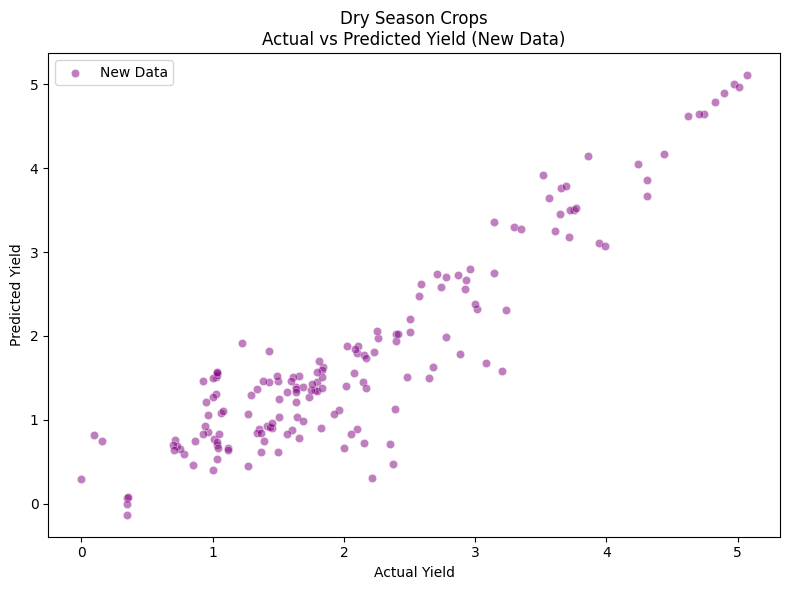

WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\AppData\Local\Temp\ipykernel_20780\2243753103.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dry_season_crops_test['Predicted_Yield'] = new_predictions



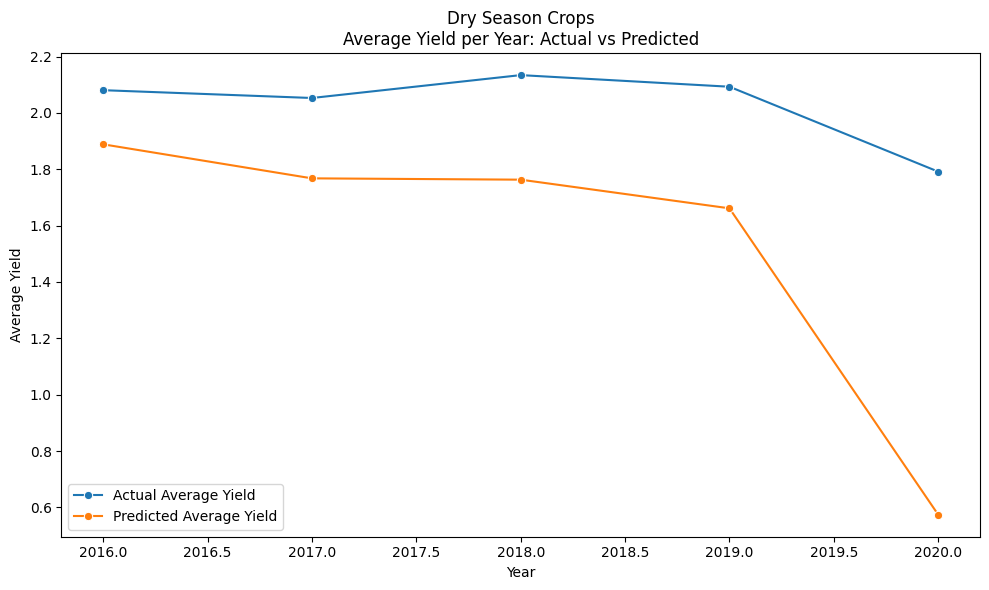

In [379]:
# Load the model and scaler

model = joblib.load('trained_model.pkl')
target_scaler = joblib.load('target_scaler.pkl')

# Prepare new data
X_new = dry_season_crops_test.drop(['Yield', 'Annual_Rainfall'], axis=1)
y_new_actual = dry_season_crops_test['Yield']

# Predict on new data
new_predictions_scaled = model.predict(X_new)
new_predictions = target_scaler.inverse_transform(new_predictions_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mse_new = mean_squared_error(y_new_actual, new_predictions)
rmse_new = np.sqrt(mse_new)
mae_new = mean_absolute_error(y_new_actual, new_predictions)
r2_new = r2_score(y_new_actual, new_predictions)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_new = X_new.shape[0]
p = X_new.shape[1]
adjusted_r2_new = adjusted_r2(r2_new, n_new, p)

print("Mean Squared Error (New Data):", mse_new)
print("Root Mean Squared Error (New Data):", rmse_new)
print("Mean Absolute Error (New Data):", mae_new)
print("R² (New Data):", r2_new)
print("Adjusted R² (New Data):", adjusted_r2_new)

# Plot the actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_new_actual, y=new_predictions, color='purple', label='New Data', alpha=0.5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Dry Season Crops\nActual vs Predicted Yield (New Data)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate average yield for each year for actual and predicted data
dry_season_crops_test['Predicted_Yield'] = new_predictions

actual_avg_yield_per_year = dry_season_crops_test.groupby('Crop_Year')['Yield'].mean()
predicted_avg_yield_per_year = dry_season_crops_test.groupby('Crop_Year')['Predicted_Yield'].mean()

# Create a DataFrame to store the averages
avg_yield_per_year = pd.DataFrame({
    'Actual_Avg_Yield': actual_avg_yield_per_year,
    'Predicted_Avg_Yield': predicted_avg_yield_per_year
}).reset_index()

# Plot the average yield for each year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Actual_Avg_Yield', data=avg_yield_per_year, marker='o', label='Actual Average Yield')
sns.lineplot(x='Crop_Year', y='Predicted_Avg_Yield', data=avg_yield_per_year, marker='o', label='Predicted Average Yield')

plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Dry Season Crops\nAverage Yield per Year: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()


WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Mean Squared Error (Training): 0.15538421476682282
Mean Squared Error (Testing): 0.13692210257546733
Root Mean Squared Error (Training): 0.39418804493137893
Root Mean Squared Error (Testing): 0.3700298671397585
Mean Absolute Error (Training): 0.1343523772566733
Mean Absolute Error (Testing): 0.2196025974912759
R² (Training): 0.9340599207366128
R² (Testing): 0.9239632114435212
Adjusted R² (Training): 0.9337569220955404
Adjusted R² (Testing): 0.9225452759925845


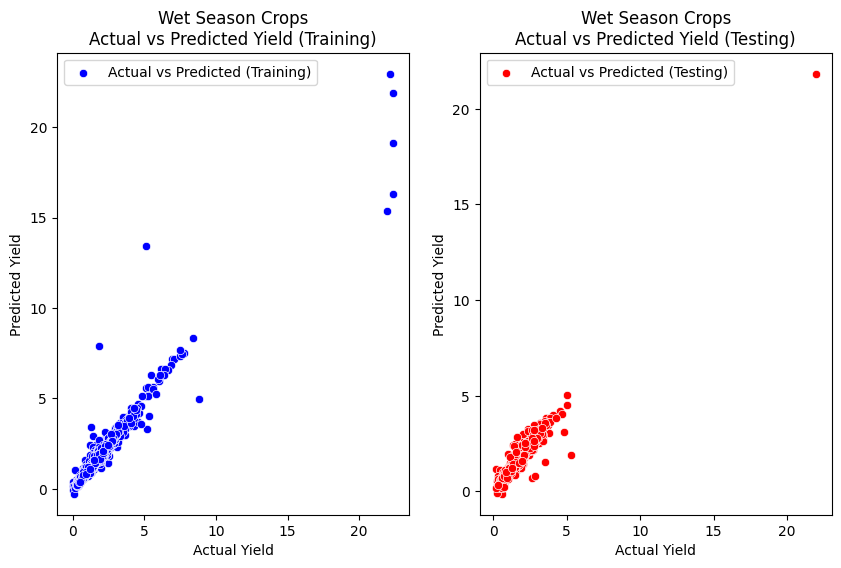

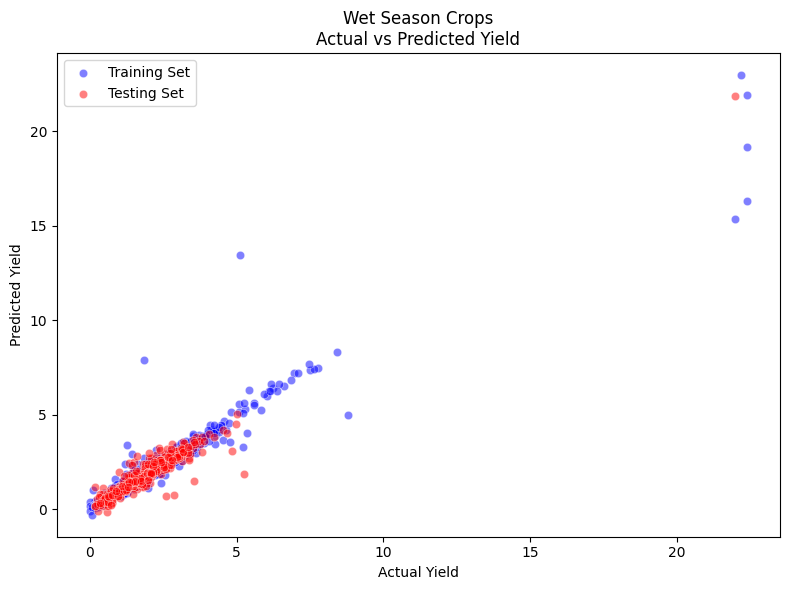

<Figure size 640x480 with 0 Axes>

In [360]:
# create a model for the wet season crops

'''
WET SEASON CROPS
WITHOUT RAINFALL, WITH STATE, alpha = 0.0001, 2 hidden layers, 100 nodes, 200 iters
'''

# Separate features and target variable
X = wet_season_crops_train.drop(['Yield', 'Annual_Rainfall'], axis=1)
y = wet_season_crops_train['Yield']

# Define data preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Crop', 'Season', 'State']),  # One-hot encode categorical features
        ('num', StandardScaler(), ['Area', 'Production', 'Crop_Year', 'Fertilizer', 'Pesticide'])  # Standardize numerical features
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Define neural network with L2 regularization
def create_neural_network_l2(num_hidden_layers=2, num_neurons=100, activation='relu', max_iter=200, alpha=0.0001):
    hidden_layer_sizes = tuple([num_neurons] * num_hidden_layers)  # Define the hidden layer sizes
    return MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, max_iter=max_iter, alpha=alpha, random_state=42)

# Scale the target variable
target_scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on the training target variable
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# Transform the test target variable
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Create a pipeline with the preprocessor and the neural network model with L2 regularization
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Data preprocessing
    ('regressor', create_neural_network_l2(num_hidden_layers=2, max_iter=200, alpha=0.0001))  # Neural network model with L2 regularization
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train_scaled)

# Predict on the training and testing data
y_train_pred_scaled = pipeline.predict(X_train)
y_test_pred_scaled = pipeline.predict(X_test)

# Inverse transform the predictions to get the original scale
y_train_pred = target_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_test_pred = target_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate Adjusted R²
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = adjusted_r2(r2_train, n_train, p)

n_test = X_test.shape[0]
adjusted_r2_test = adjusted_r2(r2_test, n_test, p)

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Testing):", mse_test)
print("Root Mean Squared Error (Training):", rmse_train)
print("Root Mean Squared Error (Testing):", rmse_test)
print("Mean Absolute Error (Training):", mae_train)
print("Mean Absolute Error (Testing):", mae_test)
print("R² (Training):", r2_train)
print("R² (Testing):", r2_test)
print("Adjusted R² (Training):", adjusted_r2_train)
print("Adjusted R² (Testing):", adjusted_r2_test)

# Plot the actual vs predicted yield for training and testing data
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Actual vs Predicted (Training)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Wet Season Crops\nActual vs Predicted Yield (Training)')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Actual vs Predicted (Testing)')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Wet Season Crops\nActual vs Predicted Yield (Testing)')
plt.legend()

plt.figure(figsize=(8, 6))

# Plot actual vs predicted for training and testing set on same graph
sns.scatterplot(x=y_train, y=y_train_pred, color='blue', label='Training Set', alpha = 0.5)

sns.scatterplot(x=y_test, y=y_test_pred, color='red', label='Testing Set', alpha = 0.5)

plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Wet Season Crops\nActual vs Predicted Yield')
plt.legend()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


In [350]:
# save trained model

joblib.dump(pipeline, 'wet_trained_model.pkl')

['wet_trained_model.pkl']

In [351]:
# load trained model

joblib.dump(target_scaler, 'wet_target_scaler.pkl')

['wet_target_scaler.pkl']

Mean Squared Error (New Data): 1.0304774691514182
Root Mean Squared Error (New Data): 1.0151243614215049
Mean Absolute Error (New Data): 0.7016411651394712
R² (New Data): 0.38767074607481833
Adjusted R² (New Data): 0.37854663467527094


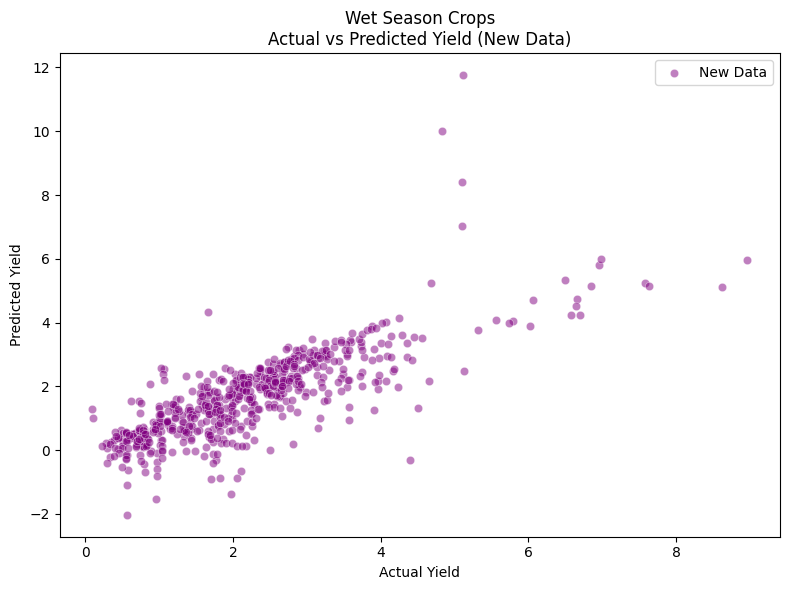

WARNING - (py.warnings._showwarnmsg) - C:\Users\rxh07\AppData\Local\Temp\ipykernel_20780\2712361537.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wet_season_crops_test['Predicted_Yield'] = new_predictions



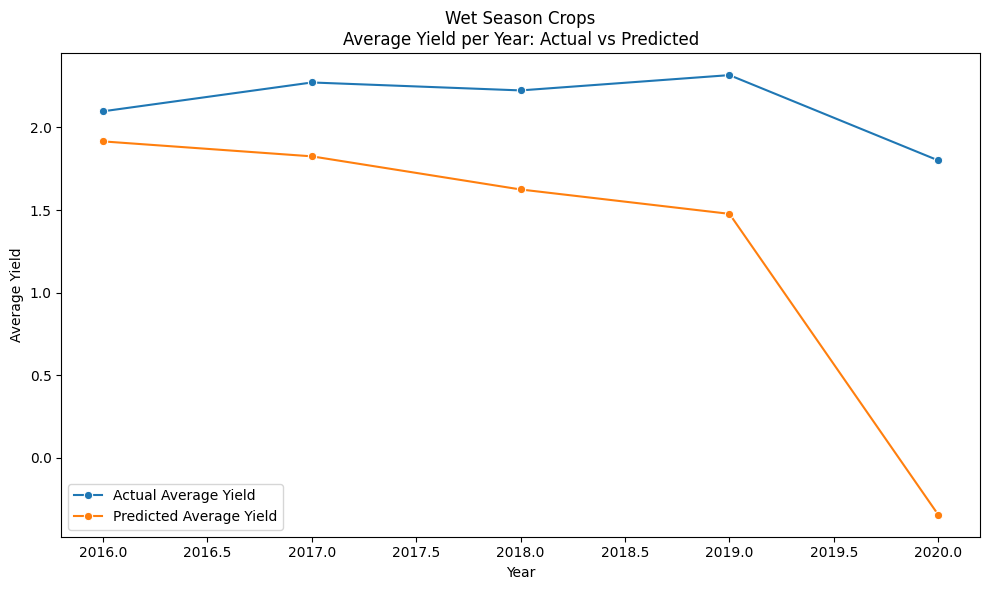

In [380]:
# Load the model and scaler

model = joblib.load('trained_model.pkl')
target_scaler = joblib.load('target_scaler.pkl')

# Prepare new data
X_new = wet_season_crops_test.drop(['Yield', 'Annual_Rainfall'], axis=1)
y_new_actual = wet_season_crops_test['Yield']

# Predict on new data
new_predictions_scaled = model.predict(X_new)
new_predictions = target_scaler.inverse_transform(new_predictions_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
mse_new = mean_squared_error(y_new_actual, new_predictions)
rmse_new = np.sqrt(mse_new)
mae_new = mean_absolute_error(y_new_actual, new_predictions)
r2_new = r2_score(y_new_actual, new_predictions)

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_new = X_new.shape[0]
p = X_new.shape[1]
adjusted_r2_new = adjusted_r2(r2_new, n_new, p)

print("Mean Squared Error (New Data):", mse_new)
print("Root Mean Squared Error (New Data):", rmse_new)
print("Mean Absolute Error (New Data):", mae_new)
print("R² (New Data):", r2_new)
print("Adjusted R² (New Data):", adjusted_r2_new)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_new_actual, y=new_predictions, color='purple', label='New Data', alpha=0.5)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Wet Season Crops\nActual vs Predicted Yield (New Data)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate average yield for each year for actual and predicted data
wet_season_crops_test['Predicted_Yield'] = new_predictions

actual_avg_yield_per_year = wet_season_crops_test.groupby('Crop_Year')['Yield'].mean()
predicted_avg_yield_per_year = wet_season_crops_test.groupby('Crop_Year')['Predicted_Yield'].mean()

# Create a DataFrame to store the averages
avg_yield_per_year = pd.DataFrame({
    'Actual_Avg_Yield': actual_avg_yield_per_year,
    'Predicted_Avg_Yield': predicted_avg_yield_per_year
}).reset_index()

# Plot the average yield for each year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Crop_Year', y='Actual_Avg_Yield', data=avg_yield_per_year, marker='o', label='Actual Average Yield')
sns.lineplot(x='Crop_Year', y='Predicted_Avg_Yield', data=avg_yield_per_year, marker='o', label='Predicted Average Yield')

plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.title('Wet Season Crops\nAverage Yield per Year: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()
